<a href="https://colab.research.google.com/github/HummerQAQ/-python/blob/main/%E3%80%8C%5BTxM_2025%5D%E3%80%8CWeek5__POS%2C_NER%2C_TF_IDF%2C_Classification%E3%80%8D%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment from **[111071048]**

*   清單項目
*   清單項目



# WEEK 5 Workshop
* TF-IDF
* POS Tagging & NER extraction

# 1. Initialization

## Load Packages

If you want to harvest more webscraping skills, you may google or take a first  looking at this article:
* HTML ABC: https://youtu.be/kUMe1FH4CHE
* Implementing Web Scraping in Python with BeautifulSoup https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/

* BeautifulSoup Tutorial: Scraping Web Pages With Python https://www.scrapingdog.com/blog/beautifulsoup-tutorial-web-scraping-with-python/

* Web Scraping with Python - Beautiful Soup Crash Course https://www.youtube.com/watch?v=XVv6mJpFOb0

In [ ]:
import pandas as pd

In [ ]:
import os

In [ ]:
import math

# Part1. Part of Speech (POS) Tagging


## English POS using nltk package

In [ ]:
text="""National Tsing Hua University was established in Beijing in 1911 as “Tsing Hua Academy”."""
text2="""In 1956, National Tsing Hua University was re-established at its present location in Hsinchu, Taiwan."""

### Compare POS tagging between NLTK and Spacy

#### NLTK

In [ ]:
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
text_tokens = nltk.word_tokenize(text)

In [ ]:
print(text_tokens)

['National', 'Tsing', 'Hua', 'University', 'was', 'established', 'in', 'Beijing', 'in', '1911', 'as', '“', 'Tsing', 'Hua', 'Academy', '”', '.']


In [ ]:
# averaged_perceptron_tagger

nltk.download('averaged_perceptron_tagger')

# universal_tagset
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
from nltk import pos_tag

In [ ]:
!pip3 install svgling
import svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
# NLTK POS tagging
nltk.download('averaged_perceptron_tagger_eng')

nltk_tags = nltk.pos_tag(text_tokens)
print(nltk_tags)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('National', 'NNP'), ('Tsing', 'NNP'), ('Hua', 'NNP'), ('University', 'NNP'), ('was', 'VBD'), ('established', 'VBN'), ('in', 'IN'), ('Beijing', 'NNP'), ('in', 'IN'), ('1911', 'CD'), ('as', 'IN'), ('“', 'JJ'), ('Tsing', 'NNP'), ('Hua', 'NNP'), ('Academy', 'NNP'), ('”', 'NNP'), ('.', '.')]


In [ ]:
nltk_tags

[('National', 'NNP'),
 ('Tsing', 'NNP'),
 ('Hua', 'NNP'),
 ('University', 'NNP'),
 ('was', 'VBD'),
 ('established', 'VBN'),
 ('in', 'IN'),
 ('Beijing', 'NNP'),
 ('in', 'IN'),
 ('1911', 'CD'),
 ('as', 'IN'),
 ('“', 'JJ'),
 ('Tsing', 'NNP'),
 ('Hua', 'NNP'),
 ('Academy', 'NNP'),
 ('”', 'NNP'),
 ('.', '.')]

In [ ]:
from nltk.tree import Tree

In [ ]:
tagged_words = [(word, tag) for word, tag in nltk_tags]
tree = Tree.fromstring("(" + str(tagged_words)[1:-1] + ")")

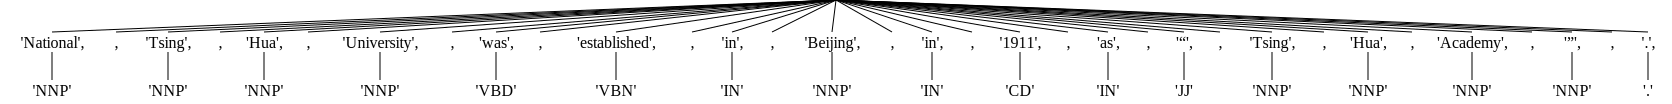

In [ ]:
display(tree)

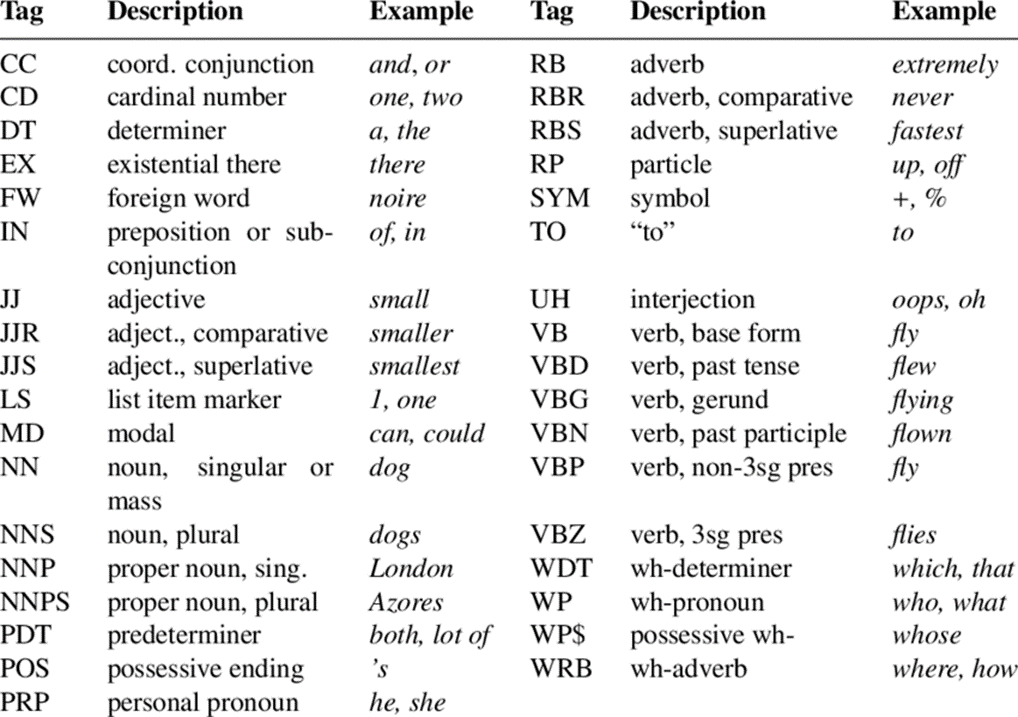

In [ ]:
from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


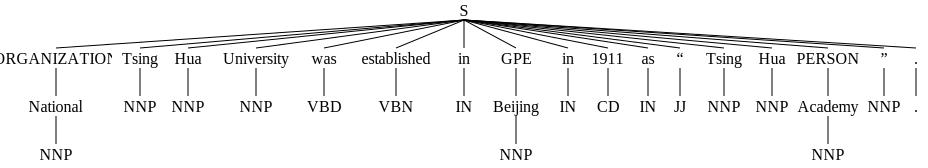

In [ ]:
nltk.download('maxent_ne_chunker_tab')
entities = nltk.chunk.ne_chunk(nltk_tags)
entities

#### spaCy

In [ ]:
import spacy

In [ ]:
from IPython.core.display import HTML
from spacy import displacy

In [ ]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Spacy POS tagging
spacy_tags = [(token.text, token.pos_) for token in nlp(text)]

In [ ]:
doc = nlp(text)

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

National National PROPN NNP compound Xxxxx True False
Tsing Tsing PROPN NNP compound Xxxxx True False
Hua Hua PROPN NNP compound Xxx True False
University University PROPN NNP nsubjpass Xxxxx True False
was be AUX VBD auxpass xxx True True
established establish VERB VBN ROOT xxxx True False
in in ADP IN prep xx True True
Beijing Beijing PROPN NNP pobj Xxxxx True False
in in ADP IN prep xx True True
1911 1911 NUM CD pobj dddd False False
as as ADP IN prep xx True True
“ " PUNCT `` punct “ False False
Tsing Tsing PROPN NNP compound Xxxxx True False
Hua Hua PROPN NNP compound Xxx True False
Academy Academy PROPN NNP pobj Xxxxx True False
” " PUNCT '' punct ” False False
. . PUNCT . punct . False False


In [ ]:
ents_parse = displacy.parse_deps(doc)

options = {
    "fine_grained": True,
    "color": "blue",
    "collapse_phrases": True,
    "distance": 150
    }


html = displacy.render(ents_parse, style="dep", manual=True, options=options)

display(HTML(html))

<IPython.core.display.HTML object>

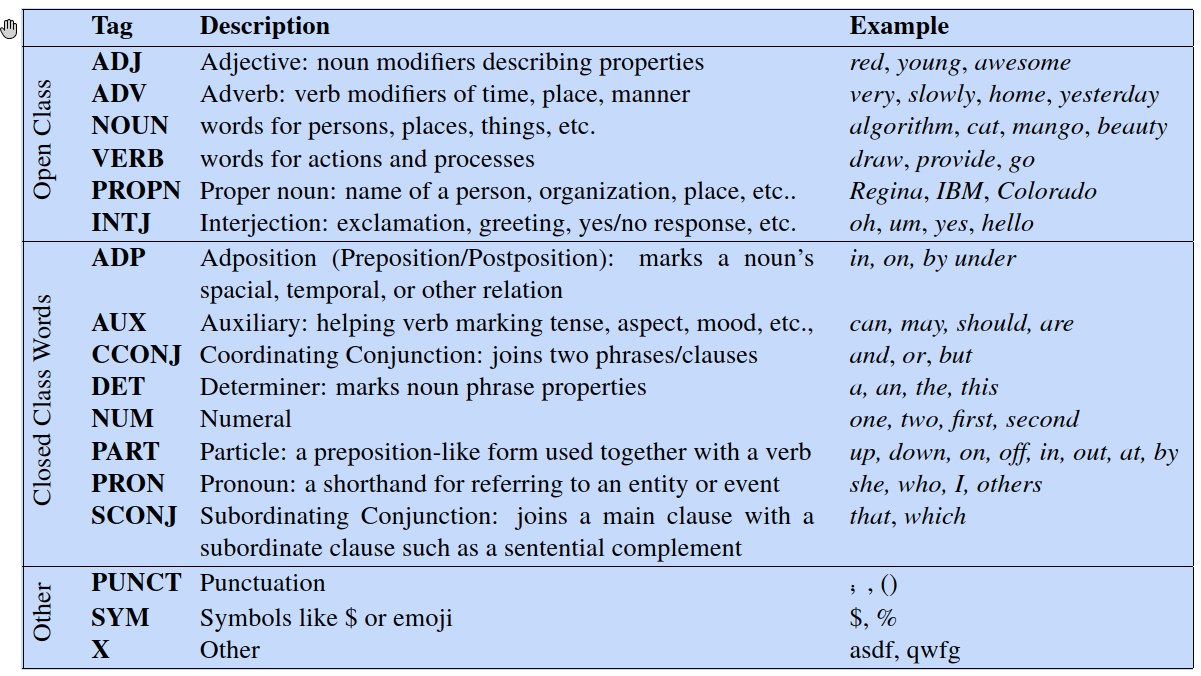

In [ ]:
print("Spacy POS tags:")
print(spacy_tags)
print("\n\n")
print("NLTK POS tags:")
print(nltk_tags)

Spacy POS tags:
[('National', 'PROPN'), ('Tsing', 'PROPN'), ('Hua', 'PROPN'), ('University', 'PROPN'), ('was', 'AUX'), ('established', 'VERB'), ('in', 'ADP'), ('Beijing', 'PROPN'), ('in', 'ADP'), ('1911', 'NUM'), ('as', 'ADP'), ('“', 'PUNCT'), ('Tsing', 'PROPN'), ('Hua', 'PROPN'), ('Academy', 'PROPN'), ('”', 'PUNCT'), ('.', 'PUNCT')]



NLTK POS tags:
[('National', 'NNP'), ('Tsing', 'NNP'), ('Hua', 'NNP'), ('University', 'NNP'), ('was', 'VBD'), ('established', 'VBN'), ('in', 'IN'), ('Beijing', 'NNP'), ('in', 'IN'), ('1911', 'CD'), ('as', 'IN'), ('“', 'JJ'), ('Tsing', 'NNP'), ('Hua', 'NNP'), ('Academy', 'NNP'), ('”', 'NNP'), ('.', '.')]


#### Chinese POS using spacy package

In [ ]:
chinese_text = """國立清華大學於1911年在北京成立，當時名為「清華學堂」。1956年，國立清華大學在台灣新竹重新成立並搬遷至現址。"""

##"國立清華大學立校於中西文化激盪之際，不同學問的思辨，本土與國際的對話，滋養人才，學貫中西，貢獻人群，橫跨學術、藝術、文學、軍事、政治、經濟各領域，為本校傲人的傳統。學校歷經變遷，而弦歌不曾稍歇；於逆境中，自強以不息，於板蕩中，厚德以載物，是本校師生的精神與面貌，以迄於今。"

In [ ]:
from spacy.lang.zh.examples import sentences

In [ ]:
spacy.cli.download("zh_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('zh_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp_zh = spacy.load("zh_core_web_md")
doc_chi = nlp_zh(chinese_text)
print(doc_chi.text)

for token in doc_chi:
    print(((token.text,
            token.lemma_,
            token.pos_,
            token.tag_,
            token.dep_,
            token.shape_,
            token.is_alpha,
            token.is_stop,
            )))

國立清華大學於1911年在北京成立，當時名為「清華學堂」。1956年，國立清華大學在台灣新竹重新成立並搬遷至現址。
('國立', '', 'NOUN', 'NN', 'compound:nn', 'xx', True, False)
('清華', '', 'NOUN', 'NN', 'compound:nn', 'xx', True, False)
('大', '', 'ADJ', 'JJ', 'amod', 'x', True, True)
('學於', '', 'PROPN', 'NR', 'nsubj', 'xx', True, False)
('1911年', '', 'NOUN', 'NT', 'nmod:tmod', 'ddddx', False, False)
('在', '', 'ADP', 'P', 'case', 'x', True, True)
('北京', '', 'PROPN', 'NR', 'nmod:prep', 'xx', True, False)
('成立', '', 'VERB', 'VV', 'ROOT', 'xx', True, False)
('，', '', 'PUNCT', 'PU', 'punct', '，', False, True)
('當時', '', 'ADV', 'AD', 'advmod', 'xx', True, False)
('名為', '', 'ADJ', 'JJ', 'amod', 'xx', True, False)
('「', '', 'PUNCT', 'PU', 'punct', '「', False, False)
('清華', '', 'NOUN', 'NN', 'compound:nn', 'xx', True, False)
('學堂', '', 'NOUN', 'NN', 'conj', 'xx', True, False)
('」', '', 'PUNCT', 'PU', 'punct', '」', False, True)
('。', '', 'PUNCT', 'PU', 'punct', '。', False, True)
('1956年', '', 'NOUN', 'NT', 'nmod:tmod', 'ddddx', False, False)
('，', '', 'PU

In [ ]:
html_chi = displacy.render(doc_chi, style="dep")

display(HTML(html_chi))

<IPython.core.display.HTML object>

### Chinese POS using jieba package

Use Jieba

* https://pypi.org/project/jieba/
* https://github.com/fxsjy/jieba

Posseg package
* part-of-speech tagging of Jieba

In [ ]:
!pip3 install jieba

In [ ]:
import jieba
import jieba.posseg as pseg

In [ ]:
#Part of Speech Tagging
pos_token = pseg.cut(chinese_text)
for w in pos_token:
  print('%s %s' % (w.word, w.flag))

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.866 seconds.
DEBUG:jieba:Loading model cost 0.866 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


國立清華大學 nt
於 nr
1911 m
年 m
在 p
北京 ns
成立 v
， x
當時 t
名為 v
「 x
清華學堂 nt
」 x
。 x
1956 m
年 m
， x
國立清華大學 nt
在 p
台灣 ns
新竹 ns
重新 a
成立 v
並 c
搬遷 v
至 p
現址 n
。 x


In [ ]:
def jieba_tokenizer(text):
    tokens = jieba.cut(text)
    return [token for token in tokens]

In [ ]:
from spacy.tokens import Doc

In [ ]:
testtokens = jieba.cut(chinese_text, cut_all=False)
print(testtokens)
print('/'.join(testtokens))

<generator object Tokenizer.cut at 0x7802847838a0>
國立/清華大學/於/1911/年/在/北京/成立/，/當時/名為/「/清華學堂/」/。/1956/年/，/國立/清華大學/在/台灣/新竹/重新/成立/並搬/遷/至/現址/。


Add your customized term

In [ ]:
jieba.add_word('國立清華大學')

In [ ]:
testtokens = jieba.cut(chinese_text, cut_all=False)
print(testtokens)
print('/'.join(testtokens))

<generator object Tokenizer.cut at 0x7801bcb4be20>
國立清華大學/於/1911/年/在/北京/成立/，/當時/名為/「/清華學堂/」/。/1956/年/，/國立清華大學/在/台灣/新竹/重新/成立/並搬/遷/至/現址/。


In [ ]:
tokens = jieba_tokenizer(chinese_text)
doc_jie = Doc(nlp_zh.vocab, words=tokens)
dep_parse_jie = displacy.parse_deps(doc_jie)

html = displacy.render(dep_parse_jie, style="dep", manual=True)

display(HTML(html))

/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:141: UserWarning: [W005] Doc object not parsed. This means displaCy won't be able to generate a dependency visualization for it. Make sure the Doc was processed with a model that supports dependency parsing, and not just a language class like `English()`. For more info, see the docs:
https://spacy.io/usage/models
  warnings.warn(Warnings.W005)


<IPython.core.display.HTML object>

In [ ]:
tokens

['國立清華大學',
 '於',
 '1911',
 '年',
 '在',
 '北京',
 '成立',
 '，',
 '當時',
 '名為',
 '「',
 '清華學堂',
 '」',
 '。',
 '1956',
 '年',
 '，',
 '國立清華大學',
 '在',
 '台灣',
 '新竹',
 '重新',
 '成立',
 '並搬',
 '遷',
 '至',
 '現址',
 '。']

In [ ]:
#Part of Speech Tagging
cn_pos_tokens = pseg.cut(chinese_text)
#Extract noun token
noun_cntokens =[] # create empty list
for token in cn_pos_tokens:
  #print(token.flag)
  if token.flag=="nt":
    #print(token.word)
    noun_cntokens+=[token.word]
print(noun_cntokens)

['清華學堂']


### Chinese POS using ckiptransformer (ckiptagger package is deprecated)

ckip transformer
* https://github.com/ckiplab/ckip-transformers

In [ ]:
!pip3 install -U ckip-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip3 install -U transformers

In [ ]:
from ckip_transformers.nlp import CkipWordSegmenter,CkipPosTagger,CkipNerChunker

In [ ]:
# Initialize drivers
ws_driver  = CkipWordSegmenter(model="bert-base")
pos_driver = CkipPosTagger(model="bert-base")
ner_driver = CkipNerChunker(model="bert-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.86k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/407M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/407M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/407M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
text = [chinese_text,
      ]

In [ ]:
ws  = ws_driver(text)
pos = pos_driver(ws)
ner = ner_driver(text)


Tokenization: 100%|██████████| 1/1 [00:00<00:00, 1912.59it/s]

Inference: 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

Tokenization: 100%|██████████| 1/1 [00:00<00:00, 2041.02it/s]

Inference: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

Tokenization: 100%|██████████| 1/1 [00:00<00:00, 1323.54it/s]

Inference: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


In [ ]:
# Pack word segmentation and part-of-speech results
def pack_ws_pos_sentece(sentence_ws, sentence_pos):
   assert len(sentence_ws) == len(sentence_pos)
   res = []
   for word_ws, word_pos in zip(sentence_ws, sentence_pos):
      res.append(f"{word_ws}({word_pos})")
   return "\u3000".join(res)


In [ ]:
for sentence, sentence_ws, sentence_pos, sentence_ner in zip(text, ws, pos, ner):
   print(sentence)
   print(pack_ws_pos_sentece(sentence_ws, sentence_pos))
   for entity in sentence_ner:
      print(entity)
   print()

國立清華大學於1911年在北京成立，當時名為「清華學堂」。1956年，國立清華大學在台灣新竹重新成立並搬遷至現址。
國立(A)　清華(Nb)　大學(Nc)　於(P)　1911年(Neu)　在(P)　北京(Nc)　成立(VC)　，(COMMACATEGORY)　當時(Nd)　名為(VG)　「(PARENTHESISCATEGORY)　清華(Nb)　學堂(Nc)　」(PARENTHESISCATEGORY)　。(PERIODCATEGORY)　1956年(Nd)　，(COMMACATEGORY)　國立(A)　清華(Nb)　大學(Nc)　在(P)　台灣(Nc)　新竹(Nc)　重新(D)　成立(VC)　並(Cbb)　搬遷(VC)　至(P)　現址(Na)　。(PERIODCATEGORY)
NerToken(word='國立清華大學', ner='ORG', idx=(0, 6))
NerToken(word='1911年', ner='DATE', idx=(7, 12))
NerToken(word='北京', ner='GPE', idx=(13, 15))
NerToken(word='清華學堂', ner='ORG', idx=(23, 27))
NerToken(word='1956年', ner='DATE', idx=(29, 34))
NerToken(word='國立清華大學', ner='ORG', idx=(35, 41))
NerToken(word='台灣', ner='GPE', idx=(42, 44))
NerToken(word='新竹', ner='GPE', idx=(44, 46))



## NER (Named-Entity Recognition)

In [ ]:
html = displacy.render(doc, style="ent")
display(HTML(html))

<IPython.core.display.HTML object>

In [ ]:
import spacy
from spacy import displacy
from IPython.core.display import HTML

html_ner = displacy.render(doc_chi, style="ent")
display(HTML(html_ner))


<IPython.core.display.HTML object>

# Part2. Tf-idf

First, let's see a easy sample about tf/idf

In [ ]:
import re

def normalize_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation (keep only letters, numbers, and whitespace)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text


In [ ]:
doc1 = "Artificial intelligence is revolutionizing our world."
doc2 = "Deep learning is a branch of artificial intelligence!"
doc3 = "Machine learning algorithm is used in various industries."

# Normalize the documents and then split into tokens
doc1_tokens = normalize_text(doc1).split()
doc2_tokens = normalize_text(doc2).split()
doc3_tokens = normalize_text(doc3).split()

doc_all = {"doc1": doc1_tokens, "doc2": doc2_tokens, "doc3": doc3_tokens}
print(doc_all)

{'doc1': ['artificial', 'intelligence', 'is', 'revolutionizing', 'our', 'world'], 'doc2': ['deep', 'learning', 'is', 'a', 'branch', 'of', 'artificial', 'intelligence'], 'doc3': ['machine', 'learning', 'algorithm', 'is', 'used', 'in', 'various', 'industries']}


In [ ]:
# create tf function
def tf(term, token_doc):
  term_count = token_doc.count(term)
  tf = term_count/len(token_doc)
  print(f"word:[{term}]'s tf is {term_count}/{len(token_doc)}\n\n")

  return tf

# create function to calculate how many doc contain the term
def numDocsContaining(word, token_doclist):
  doccount = 0
  for doc_token in token_doclist:
    if doc_token.count(word) > 0:
      doccount +=1
  return doccount

# create function to calculate  Inverse Document Frequency in doclist
def idf(word, token_doclist):
  n = len(token_doclist)
  df = numDocsContaining(word, token_doclist)
  print(f"word:[{word}]'s idf is math.log10({n}/{df})\n\n")
  return math.log10(n/df)

In [ ]:
# example count how many doc cotain term "this"
numDocsContaining("intelligence", doc_all.values())

2

In [ ]:
#create bag words
bag_words =[] # declare bag_words is a list
for doc in doc_all.keys():
  bag_words += doc_all[doc]
bag_words=set(bag_words)
print(bag_words)

{'intelligence', 'artificial', 'industries', 'branch', 'learning', 'of', 'is', 'machine', 'algorithm', 'used', 'world', 'in', 'revolutionizing', 'deep', 'various', 'our', 'a'}


In [ ]:
#calculate idf for every word in bag_words
bag_words_idf={} # declare "bag_words_idf" data structure is dictionary
for word in bag_words:
  bag_words_idf[word]= idf(word,doc_all.values())

print(bag_words_idf)

word:[intelligence]'s idf is math.log10(3/2)


word:[artificial]'s idf is math.log10(3/2)


word:[industries]'s idf is math.log10(3/1)


word:[branch]'s idf is math.log10(3/1)


word:[learning]'s idf is math.log10(3/2)


word:[of]'s idf is math.log10(3/1)


word:[is]'s idf is math.log10(3/3)


word:[machine]'s idf is math.log10(3/1)


word:[algorithm]'s idf is math.log10(3/1)


word:[used]'s idf is math.log10(3/1)


word:[world]'s idf is math.log10(3/1)


word:[in]'s idf is math.log10(3/1)


word:[revolutionizing]'s idf is math.log10(3/1)


word:[deep]'s idf is math.log10(3/1)


word:[various]'s idf is math.log10(3/1)


word:[our]'s idf is math.log10(3/1)


word:[a]'s idf is math.log10(3/1)


{'intelligence': 0.17609125905568124, 'artificial': 0.17609125905568124, 'industries': 0.47712125471966244, 'branch': 0.47712125471966244, 'learning': 0.17609125905568124, 'of': 0.47712125471966244, 'is': 0.0, 'machine': 0.47712125471966244, 'algorithm': 0.47712125471966244, 'used': 0.477121254719

In [ ]:
#calculate tfidf
tfidf={} # declare tfidf dictionary to store tfidf value
for doc in doc_all.keys():
  tfidf_doc={} # delare tfidf_doc as a dictionary to store tfidf of each doc
  for term in set(doc_all[doc]):
    tfidf_doc[term]= tf(term,doc_all[doc]) * bag_words_idf[term] # calculate tfidf for each doc
  tfidf[doc]= tfidf_doc

word:[intelligence]'s tf is 1/6


word:[artificial]'s tf is 1/6


word:[is]'s tf is 1/6


word:[world]'s tf is 1/6


word:[revolutionizing]'s tf is 1/6


word:[our]'s tf is 1/6


word:[intelligence]'s tf is 1/8


word:[artificial]'s tf is 1/8


word:[branch]'s tf is 1/8


word:[learning]'s tf is 1/8


word:[of]'s tf is 1/8


word:[is]'s tf is 1/8


word:[deep]'s tf is 1/8


word:[a]'s tf is 1/8


word:[industries]'s tf is 1/8


word:[used]'s tf is 1/8


word:[learning]'s tf is 1/8


word:[is]'s tf is 1/8


word:[machine]'s tf is 1/8


word:[in]'s tf is 1/8


word:[various]'s tf is 1/8


word:[algorithm]'s tf is 1/8




In [ ]:
tfidf

{'doc1': {'intelligence': 0.029348543175946873,
  'artificial': 0.029348543175946873,
  'is': 0.0,
  'world': 0.07952020911994373,
  'revolutionizing': 0.07952020911994373,
  'our': 0.07952020911994373},
 'doc2': {'intelligence': 0.022011407381960155,
  'artificial': 0.022011407381960155,
  'branch': 0.059640156839957804,
  'learning': 0.022011407381960155,
  'of': 0.059640156839957804,
  'is': 0.0,
  'deep': 0.059640156839957804,
  'a': 0.059640156839957804},
 'doc3': {'industries': 0.059640156839957804,
  'used': 0.059640156839957804,
  'learning': 0.022011407381960155,
  'is': 0.0,
  'machine': 0.059640156839957804,
  'in': 0.059640156839957804,
  'various': 0.059640156839957804,
  'algorithm': 0.059640156839957804}}

doc1 = "this is a good sample"

doc2 = "this is another example another example example"

In [ ]:
#convert to pandas frame
tf_dataframe = pd.DataFrame(tfidf).transpose().fillna(0)
tf_dataframe

,intelligence,artificial,is,world,revolutionizing,our,branch,learning,of,deep,a,industries,used,machine,in,various,algorithm
doc1,0.029349,0.029349,0.0,0.07952,0.07952,0.07952,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
doc2,0.022011,0.022011,0.0,0.00000,0.00000,0.00000,0.05964,0.022011,0.05964,0.05964,0.05964,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
doc3,0.000000,0.000000,0.0,0.00000,0.00000,0.00000,0.00000,0.022011,0.00000,0.00000,0.00000,0.05964,0.05964,0.05964,0.05964,0.05964,0.05964


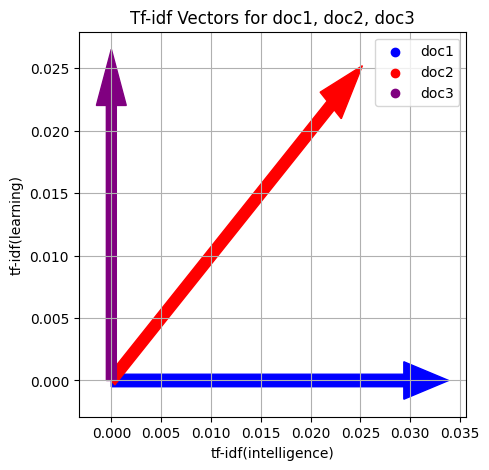

In [ ]:
# prompt: use tf-idf from tf_dataframe, depict plot to show the vector of doc1 and doc2 , where x = 'good' and y = 'sample'

import matplotlib.pyplot as plt

# Assuming tf_dataframe is already created as in your provided code

# Extract the vectors for doc1 and doc2
doc1_vector = tf_dataframe.loc['doc1']
doc2_vector = tf_dataframe.loc['doc2']
doc3_vector = tf_dataframe.loc['doc3']

# Get the tf-idf values for 'good' and 'sample'
x_doc1 = doc1_vector['intelligence']
y_doc1 = doc1_vector['learning']
x_doc2 = doc2_vector['intelligence']
y_doc2 = doc2_vector['learning']
x_doc3 = doc3_vector['intelligence']
y_doc3 = doc3_vector['learning']

# Create the plot
plt.figure(figsize=(5, 5))
plt.arrow(0, 0, x_doc1, y_doc1, fc='blue', ec='blue')
plt.arrow(0, 0, x_doc2, y_doc2, fc='red', ec='red')
plt.arrow(0, 0, x_doc3, y_doc3, fc='purple', ec='purple')
plt.scatter(x_doc1, y_doc1, color='blue', label='doc1')
plt.scatter(x_doc2, y_doc2, color='red', label='doc2')
plt.scatter(x_doc3, y_doc3, color='purple', label='doc3')
# Add labels and title
plt.xlabel('tf-idf(intelligence)')
plt.ylabel('tf-idf(learning)')
plt.title('Tf-idf Vectors for doc1, doc2, doc3')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Ask yourself again: what is tfidf used for?

# Part3. Classification (TF-IDF vector)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#download data from google drive
import gdown
url = "https://drive.google.com/uc?id=1jbb0HQ9oTZkRNK055AvXD3ya8_ZLtN9o"
gdown.download(url,"Amazon_review.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1jbb0HQ9oTZkRNK055AvXD3ya8_ZLtN9o
To: /content/Amazon_review.csv
100%|██████████| 4.52M/4.52M [00:00<00:00, 107MB/s]


'Amazon_review.csv'

In [ ]:
#load dataset into pandas dataframe
amazon_reviewDF = pd.read_csv("Amazon_review.csv",delimiter=',',header = None)
amazon_reviewDF.columns=['text', 'label'] # name the column of dataframe
amazon_reviewDF

NameError: name 'pd' is not defined

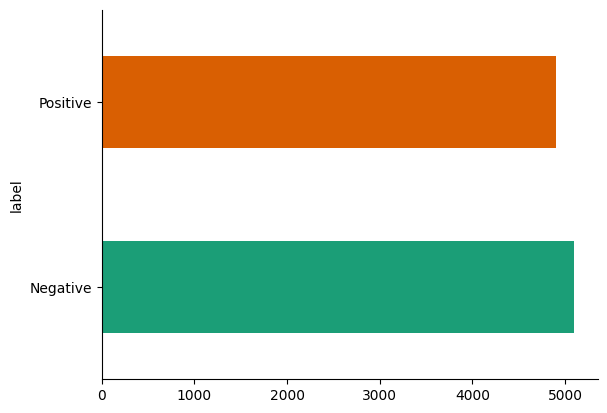

In [ ]:
# @title Data Visualization (Positive vs Negative)

from matplotlib import pyplot as plt
import seaborn as sns

amazon_reviewDF.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Step 1: Split Training - Validation- Holdout(Test) dataset

In [ ]:
import numpy as np
from sklearn import model_selection, preprocessing, metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

We divide data into three data set by 70%, 30%

In [ ]:
# Split the dataset into 70% training data and 30% holdout data (Get the train dataset and holdout dataset)
Train_Dataset_ratio = 0.7
Holdout_Dataset_ratio = 0.3

train_x, holdout_x, train_y, holdout_y = model_selection.train_test_split(amazon_reviewDF['text'],amazon_reviewDF['label'],test_size=Holdout_Dataset_ratio,random_state=np.random.randint(100))

# The final dataset ratios will be 70% train, and 30% holdout.


Check if these three data sets are as we wish: Randomly distributed and Consisted as our allocation.

In [ ]:
train_x

,text
3088,"My favorite!!: I collect Jim Shore cats, and I..."
311,NOT A RIDE ON: I should have paid closer atten...
5355,Great movie for you and your gal friends to wa...
8008,Don't use this company never got item: This co...
5545,"Help!In major confusion, WHAT TO BUY???!!!: Pl..."
...,...
8573,high school writing!: this is probably one of ...
1436,Frida's more attractive soundtrack sister: Utt...
8902,I think that its a good book: Anthony's works ...
6162,"Not good, not bad: If you like early Mark Harm..."


In [ ]:
holdout_x

,text
9972,"oh my goodness!: If this is a single release, ..."
4931,"A few kinks, but overall it works well: Unfort..."
3393,Customer service: The item is excellent and th...
5582,The turtle moves!: My sister read this book al...
1324,The book presents history from a pro-arab stan...
...,...
9890,It could have been really good...but: Some thi...
4720,Children like this book: My children (ages 5-1...
6213,Magnificently compelling...: This is a wonderf...
6392,OK: Pretty horrible. Like in WWE women cant wr...


## Step 2: Use Cross validation with Kfold to find out the best-fit classifier

Reference: https://sebastianraschka.com/blog/2016/model-evaluation-selection-part3.html

### Step 2.1 Cross Validation with K-fold

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree,  metrics
from sklearn.model_selection import KFold

Define our own classifier: classifier_tree_f

In [ ]:
global_max_features = 1000

In [ ]:
def classifier_tree_f(train_x_f, valid_x_f, train_y_f, valid_y_f):
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    # encode the target variable, label Negative/Positive -> 0/1
    encoder_f = preprocessing.LabelEncoder()
    train_y_en_f = encoder_f.fit_transform(train_y_f)
    valid_y_en_f = encoder_f.fit_transform(valid_y_f)

    tfidf_vect_f = TfidfVectorizer(stop_words='english',  max_features = global_max_features)
    tfidf_vect_f.fit(train_x_f) #Learn vocabulary and idf from training data set.
    xtrain_tfidf_f =  tfidf_vect_f.transform(train_x_f) # compute tfidf for tranning data set
    xvalid_tfidf_f =  tfidf_vect_f.transform(valid_x_f) # compute tfidf for testing data set
    classifier_tree_f = tree.DecisionTreeClassifier(random_state=1)
    # fit(find out the model from) the training dataset on the classifier (if xtrain_tfidf_f is ... then the classification should be train_y_en_f  )
    classifier_tree_f = classifier_tree_f.fit(xtrain_tfidf_f, train_y_en_f)

    # predict the labels on validation dataset
    valid_y_pred_tree_f = classifier_tree_f.predict(xvalid_tfidf_f)

    # Get the accuracy score from this model
    accuracy_tree_f = metrics.accuracy_score(valid_y_en_f, valid_y_pred_tree_f)
    return accuracy_tree_f, classifier_tree_f

Validate through 10 folds of validation data set.

(It takes times~)

In [ ]:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_kfold = []
best_accuracy_tree = 0
KFOLD_NUM = 10

kf = KFold(n_splits=KFOLD_NUM, random_state=1,shuffle=True)

_train_x = train_x.to_numpy()
_train_y = train_y.to_numpy()


In [ ]:
for train_index, test_index in kf.split(_train_x):
    print(train_index)
    train_x_fold, valid_x_fold, train_y_fold, valid_y_fold = _train_x[train_index], _train_x[test_index], _train_y[train_index], _train_y[test_index]
    accuracy_tree, classifier_tree_tmp = classifier_tree_f(train_x_fold, valid_x_fold, train_y_fold, valid_y_fold)
    accuracy_kfold+=[accuracy_tree]

    if accuracy_tree > best_accuracy_tree:
      best_accuracy_tree = accuracy_tree
      best_classifier_tree = classifier_tree_tmp
      train_x_fold_best = train_x_fold
      train_y_fold_best = train_y_fold

[   0    1    2 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]
[   0    2    3 ... 6995 6996 6997]
[   0    1    2 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]
[   1    2    3 ... 6996 6998 6999]
[   0    1    3 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]


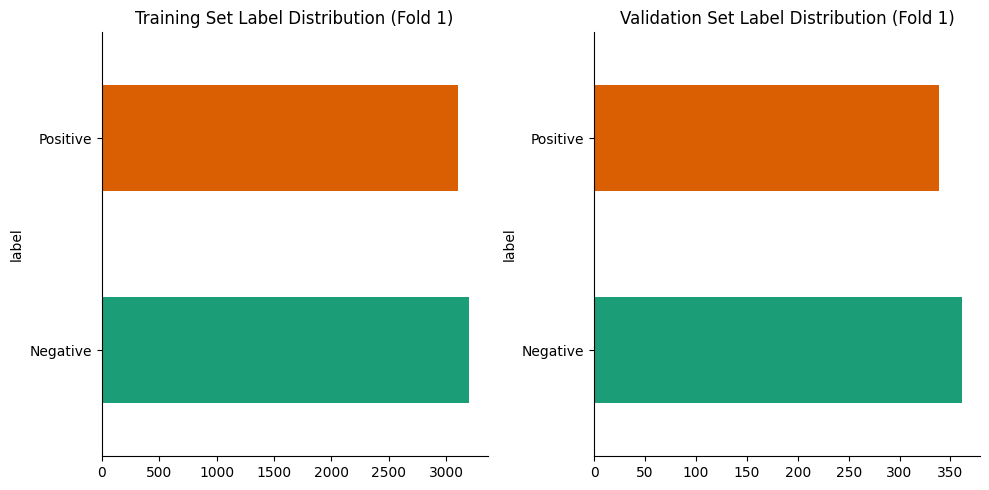

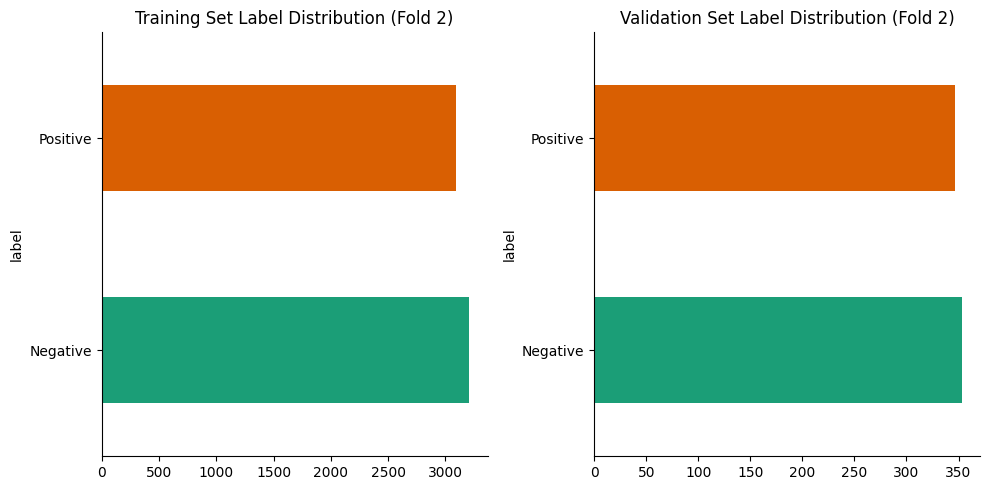

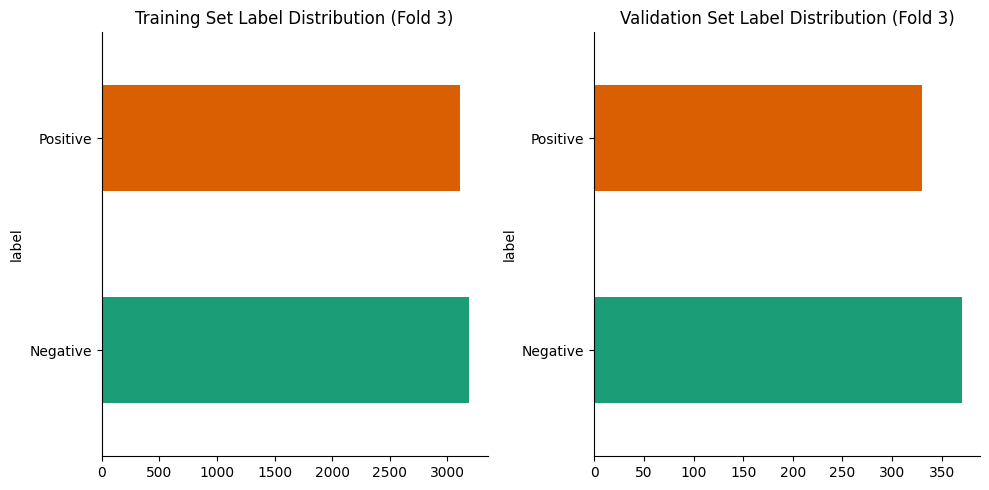

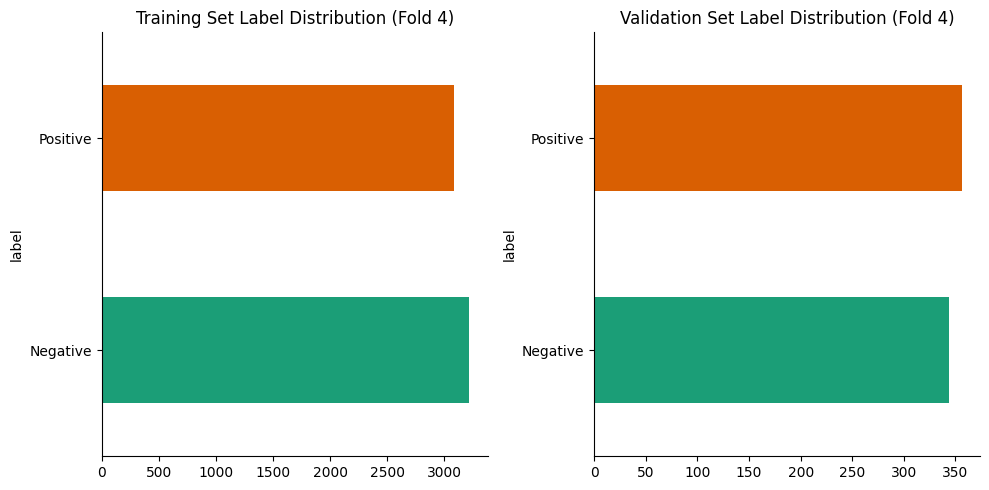

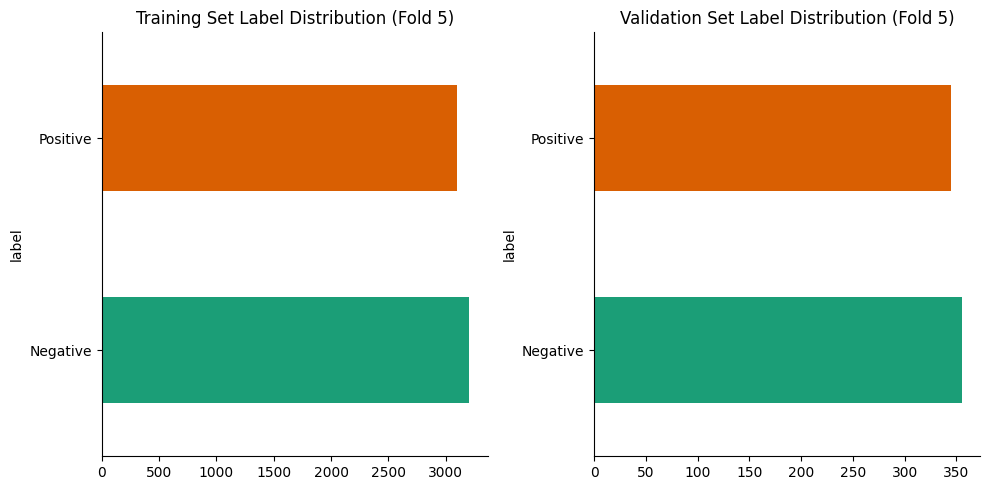

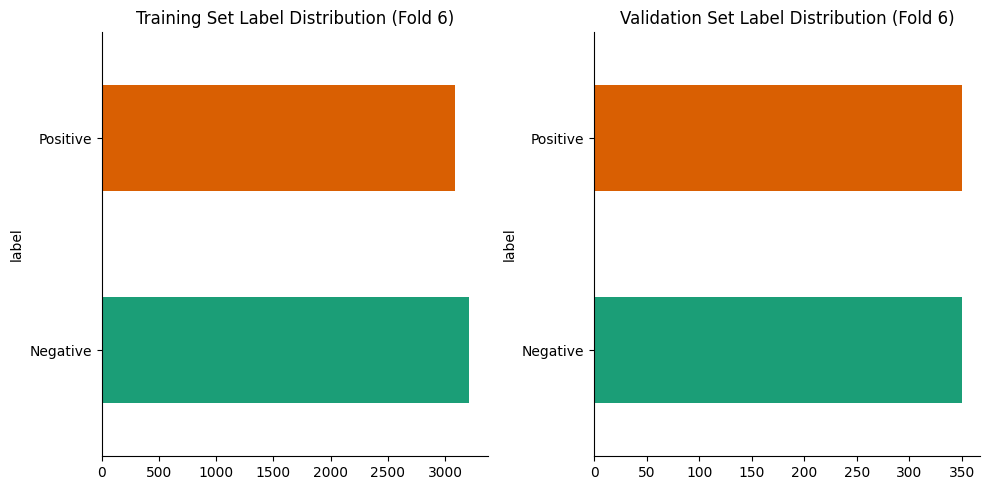

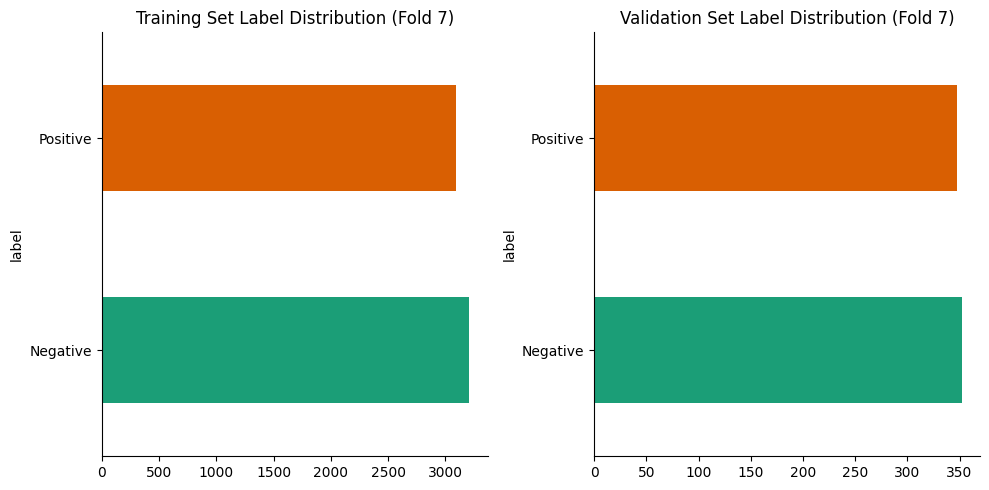

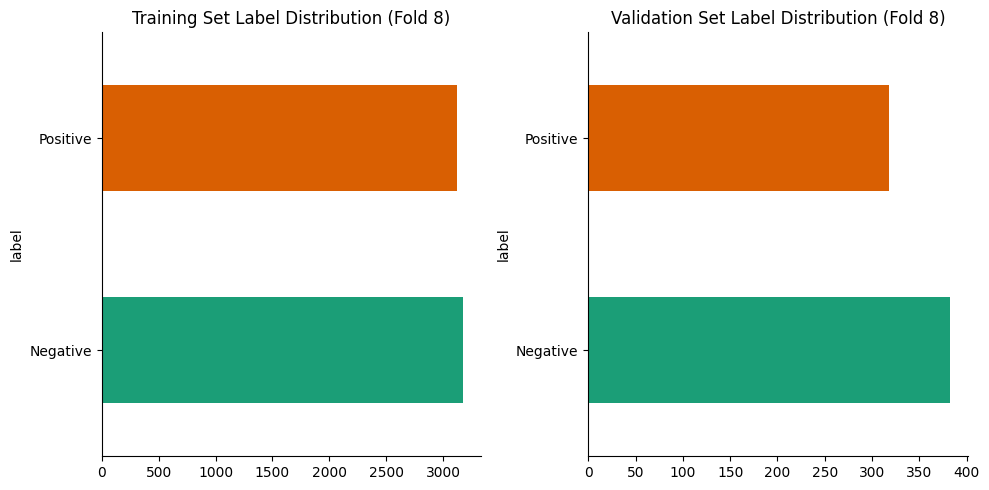

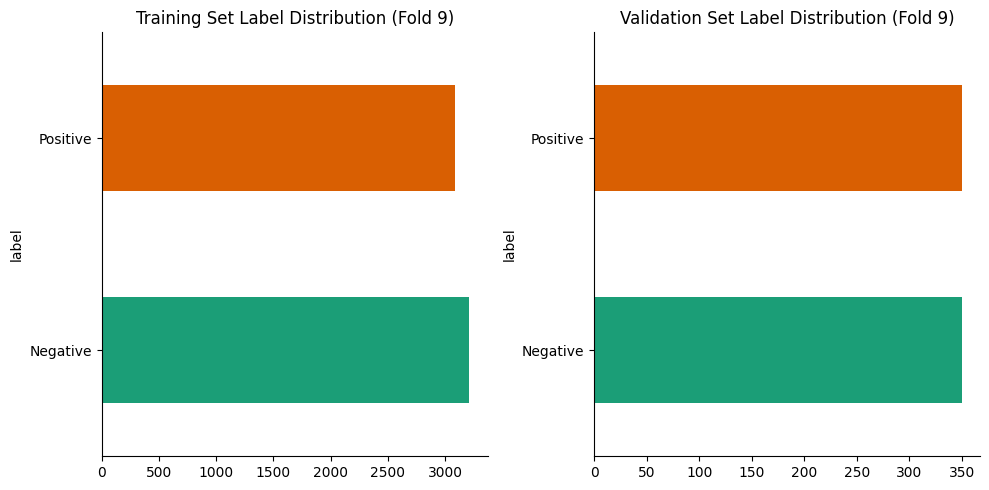

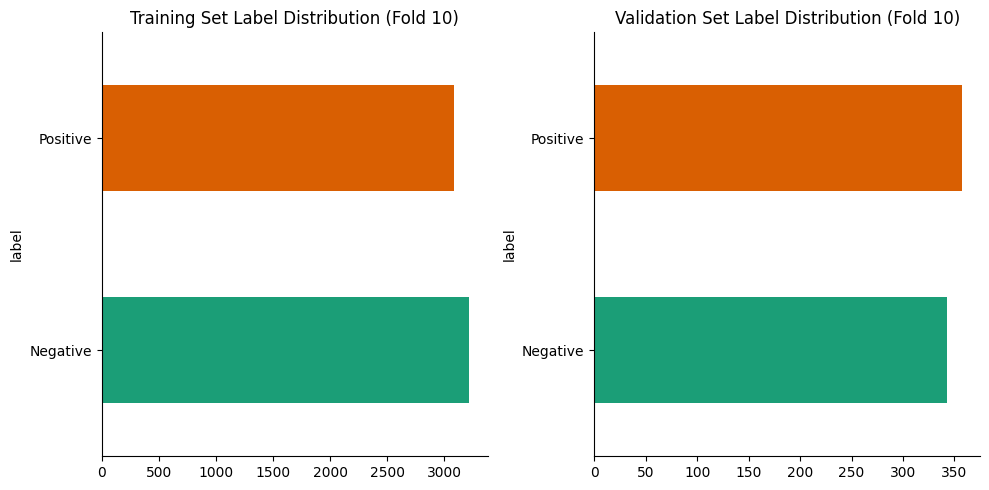

In [ ]:
kf_no=1
for train_index, test_index in kf.split(_train_x):

    # Convert train_y_fold and valid_y_fold to pandas Series for groupby
    train_y_fold = pd.Series(_train_y[train_index], name='label')
    valid_y_fold = pd.Series(_train_y[test_index], name='label')

    # Plotting the distribution of labels in training and validation sets
    plt.figure(figsize=(10, 5))  # Adjust figure size if needed

    plt.subplot(1, 2, 1)  # Create subplot for training set
    train_y_fold.groupby(train_y_fold).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
    plt.title(f'Training Set Label Distribution (Fold {kf_no})')
    plt.gca().spines[['top', 'right']].set_visible(False)

    plt.subplot(1, 2, 2)  # Create subplot for validation set
    valid_y_fold.groupby(valid_y_fold).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
    plt.title(f'Validation Set Label Distribution (Fold {kf_no})')
    plt.gca().spines[['top', 'right']].set_visible(False)

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

    kf_no+=1

In [ ]:
print(accuracy_kfold)
print(f"Accuracy kfold={KFOLD_NUM}", sum(accuracy_kfold)/len(accuracy_kfold))

[0.6885714285714286, 0.7185714285714285, 0.7271428571428571, 0.72, 0.7114285714285714, 0.7171428571428572, 0.7128571428571429, 0.7171428571428572, 0.7, 0.7157142857142857]
Accuracy kfold=10 0.7128571428571429


Find the model with highest accuracy as our best classifier!!

In [ ]:
# Find the best accuracy and its index
best_accuracy = max(accuracy_kfold)
best_index = accuracy_kfold.index(best_accuracy)

print(f"The best accuracy is {best_accuracy:.4f} in iteration {best_index + 1}")

The best accuracy is 0.7271 in iteration 3


### Step 2.2 Test the data with Holdout data set

In [ ]:
from sklearn import preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer

In the begining, you have to transform "label" in nominal into number (in our case, only 0 and 1)

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
# encode the target variable, label Negative/Positive -> 0/1
encoder = preprocessing.LabelEncoder()
train_y_en_fold = encoder.fit_transform(train_y_fold_best)
holdout_y_en = encoder.fit_transform(holdout_y)

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(stop_words='english',  max_features = global_max_features) #define method to do tfidf
tfidf_vect.fit(train_x_fold_best) #Learn vocabulary and compute idf from training data set. (in bag words)

# (Important) Due to our classifier in generated by data set from one of folds, we have to use the fold that is used by the classifier.
xtrain_tfidf_fold =  tfidf_vect.transform(train_x_fold_best) # compute tfidf for tranning data set
xholdout_tfidf =  tfidf_vect.transform(holdout_x) # compute tfidf for testing data set (holdout data set)

Noted: If we use K-fold Cross-Validation to select our best classifier, the whole training data set for rest evaluation process must use data set that generate(fit) the best model. Or you will have a incorrect result.

In this case, I store it as "train_x_fold_best" and "xtrain_tfidf_fold"

In [ ]:
tfidf_vect

TfidfVectorizer(max_features=1000, stop_words='english')

In [ ]:
# Display bag words
print(tfidf_vect.get_feature_names_out())

['10' '100' '12' '15' '1984' '20' '30' '3d' '40' '451' '50' '80' 'able'
 'absolutely' 'acting' 'action' 'actor' 'actors' 'actual' 'actually'
 'adapter' 'add' 'added' 'addition' 'admit' 'adult' 'adventure'
 'advertised' 'advice' 'age' 'ago' 'agree' 'air' 'album' 'albums' 'alot'
 'amazing' 'amazon' 'america' 'american' 'annoying' 'apart' 'appears'
 'apple' 'appreciate' 'area' 'aren' 'arrived' 'art' 'artist' 'asimov'
 'ask' 'attempt' 'attention' 'audio' 'author' 'authors' 'available'
 'average' 'avoid' 'away' 'awesome' 'awful' 'baby' 'background' 'bad'
 'band' 'based' 'basic' 'basically' 'batteries' 'battery' 'beat' 'beats'
 'beautiful' 'bed' 'beginning' 'believe' 'best' 'better' 'beware' 'big'
 'bit' 'black' 'blu' 'blue' 'body' 'book' 'books' 'boot' 'boots' 'bored'
 'boring' 'bother' 'bought' 'box' 'boy' 'bradbury' 'brand' 'break'
 'brilliant' 'bring' 'british' 'broke' 'broken' 'brother' 'brought'
 'brown' 'built' 'bunch' 'business' 'buy' 'buying' 'cable' 'called' 'came'
 'camera' 'canon

In [ ]:
# Display length of bag words
print(len(tfidf_vect.get_feature_names_out()))

1000


In [ ]:
print(train_x)

3088    My favorite!!: I collect Jim Shore cats, and I...
311     NOT A RIDE ON: I should have paid closer atten...
5355    Great movie for you and your gal friends to wa...
8008    Don't use this company never got item: This co...
5545    Help!In major confusion, WHAT TO BUY???!!!: Pl...
                              ...                        
8573    high school writing!: this is probably one of ...
1436    Frida's more attractive soundtrack sister: Utt...
8902    I think that its a good book: Anthony's works ...
6162    Not good, not bad: If you like early Mark Harm...
4218    California Exotics jack rabbit: Piece of crap....
Name: text, Length: 7000, dtype: object


In [ ]:
print(xtrain_tfidf_fold)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 113598 stored elements and shape (6300, 1000)>
  Coords	Values
  (0, 36)	0.3336233679708042
  (0, 74)	0.3349746272886229
  (0, 111)	0.23181380904584709
  (0, 303)	0.33229721090259473
  (0, 372)	0.18265274625671402
  (0, 461)	0.18439669624755353
  (0, 477)	0.3831067310933017
  (0, 680)	0.3406509459592023
  (0, 690)	0.32641475755659727
  (0, 747)	0.2652385735389661
  (0, 975)	0.32442606621683934
  (1, 53)	0.28788883481367
  (1, 154)	0.29458642113444405
  (1, 324)	0.2565772353524914
  (1, 465)	0.25977448671262493
  (1, 484)	0.3070420699902558
  (1, 601)	0.3181528471674676
  (1, 606)	0.2454225664269095
  (1, 615)	0.29379917305151676
  (1, 626)	0.25070774129319057
  (1, 644)	0.23976104216171326
  (1, 760)	0.3134263313130725
  (1, 789)	0.25283355571223964
  (1, 894)	0.26921615773506
  (2, 162)	0.2906497346593123
  :	:
  (6298, 163)	0.4062647451802082
  (6298, 250)	0.35383643658486025
  (6298, 260)	0.3420175005943187
  (6298, 367)	

In [ ]:
# Display word in the location 4679 of bag words
tfidf_vect.get_feature_names_out()[679]

'pump'

In [ ]:
from sklearn import tree,  metrics

In [ ]:
classifier_tree_final = tree.DecisionTreeClassifier(random_state=1)

# Assign best_classifier_tree as our classifier and train
classifier_tree_final = best_classifier_tree

In [ ]:
# predict the labels on holdout dataset
holdout_y_pred_tree = classifier_tree_final.predict(xholdout_tfidf)
accuracy_tree = metrics.accuracy_score(holdout_y_en, holdout_y_pred_tree)


In [ ]:
confusion_matrix_tree = metrics.confusion_matrix(holdout_y_en, holdout_y_pred_tree, labels=[0,1])
print ("Accuracy", accuracy_tree)
print ("confusion_matrix\n", confusion_matrix_tree)

print ("    ")

print("Confusion Matrix:")
print("                Predicted")
print("                Negative   Positive")
print("Actual Negative    {}         {}".format(confusion_matrix_tree[0, 0], confusion_matrix_tree[0, 1]))
print("Actual Positive    {}         {}".format(confusion_matrix_tree[1, 0], confusion_matrix_tree[1, 1]))

precision = metrics.precision_score(holdout_y_en, holdout_y_pred_tree, pos_label=1)
recall = metrics.recall_score(holdout_y_en, holdout_y_pred_tree, pos_label=1)
print ("    ")
print("Precision:", precision)
print("Recall:", recall)


Accuracy 0.7086666666666667
confusion_matrix
 [[1077  460]
 [ 414 1049]]
    
Confusion Matrix:
                Predicted
                Negative   Positive
Actual Negative    1077         460
Actual Positive    414         1049
    
Precision: 0.6951623591782637
Recall: 0.7170198222829802


In [ ]:
confusion_matrix_tree = metrics.confusion_matrix(holdout_y_en, holdout_y_pred_tree, labels=[1,0])

print ("Accuracy", accuracy_tree)
print ("Confusion Matrix\n", confusion_matrix_tree)
print ("    ")
# Print the confusion matrix with proper labels
print("Confusion Matrix:")
print("                  Predicted")
print("               Positive   Negative")
print("Actual Positive     {}         {}".format(confusion_matrix_tree[0, 0], confusion_matrix_tree[0, 1]))
print("       Negative     {}         {}".format(confusion_matrix_tree[1, 0], confusion_matrix_tree[1, 1]))

print ("    ")

# Extract counts from the confusion matrix for clarity
TP = confusion_matrix_tree[0, 0]  # True Positives: Actual positive and predicted positive
FN = confusion_matrix_tree[0, 1]  # False Negatives: Actual positive but predicted negative
FP = confusion_matrix_tree[1, 0]  # False Positives: Actual negative but predicted positive
TN = confusion_matrix_tree[1, 1]  # True Negatives: Actual negative and predicted negative

# For the Positive class:
# Here, we treat "Positive" (label 1) as the positive class for evaluation.
# Precision: the proportion of predicted positives that are actually positive.
#          Formula: TP / (TP + FP)
# Recall: the proportion of actual positives that were correctly predicted.
#         Formula: TP / (TP + FN)
precision = metrics.precision_score(holdout_y_en, holdout_y_pred_tree, pos_label=1)
recall = metrics.recall_score(holdout_y_en, holdout_y_pred_tree, pos_label=1)

# Print precision and recall values along with an explanation
print(f"Precision (Positive) Formula: TP / (TP + FP): {TP}/{TP}+{FP} = {precision}")
print(f"Recall (Positive) Formula: TP / (TP + FN): {TP}/{TP}+{FN} = {recall}")

precision_neg = metrics.precision_score(holdout_y_en, holdout_y_pred_tree, pos_label=0)
recall_neg = metrics.recall_score(holdout_y_en, holdout_y_pred_tree, pos_label=0)

# For the Negative class:
# Here, we treat "Negative" (label 0) as the positive class for evaluation.
# Precision (Negative) = TN / (TN + FN)
#   - Among all predicted negatives (TN + FN), the fraction that are truly negative (TN).
# Recall (Negative)    = TN / (TN + FP)
#   - Among all actual negatives (TN + FP), the fraction that are correctly predicted as negative (TN).
print("   ")
# Print the precision and recall values
print(f"Precision (Negative) Formula: TN / (TN + FN): {TN}/{TN}+{FN} = {precision_neg}")
print(f"Recall (Negative) Formula: TN / (TN + FP): {TN}/{TN}+{FP} = {recall_neg}")



Accuracy 0.7086666666666667
Confusion Matrix
 [[1049  414]
 [ 460 1077]]
    
Confusion Matrix:
                  Predicted
               Positive   Negative
Actual Positive     1049         414
       Negative     460         1077
    
Precision (Positive) Formula: TP / (TP + FP): 1049/1049+460 = 0.6951623591782637
Recall (Positive) Formula: TP / (TP + FN): 1049/1049+414 = 0.7170198222829802
   
Precision (Negative) Formula: TN / (TN + FN): 1077/1077+414 = 0.7223340040241448
Recall (Negative) Formula: TN / (TN + FP): 1077/1077+460 = 0.7007156798959011


Let's check our classifier (You can modify sentence here)

In [ ]:
comment="This book is great. I like it very much."
comment_tfidf =  tfidf_vect.transform([comment])
comment_predictions = classifier_tree_final.predict(comment_tfidf)
print(comment_predictions)
print(encoder.inverse_transform(comment_predictions))

[1]
['Positive']


In [ ]:
comment="Boring book. It's weird, I am confusing about it"
comment_tfidf =  tfidf_vect.transform([comment])
comment_predictions = classifier_tree_final.predict(comment_tfidf)
print(comment_predictions)
print(encoder.inverse_transform(comment_predictions))

[0]
['Negative']


Hooray!!

### Step 2.3 Evaluation

#### ROC (Receiver Operating Characteristic) & AUC (Area Under Curve of ROC)

[How it comes] In text mining, we use ROC curve to help us to calculate the AUC evaluating the performance of classification models in text mining tasks, as it provides a single, interpretable value that reflects the model's ability to discriminate between classes across different thresholds.

[How to read] A higher AUC value indicates better classifier performance, as it represents the model's ability to correctly distinguish between classes. An AUC of 0.5 suggests that the model is performing no better than random chance, while an AUC of 1.0 signifies a perfect classifier.

Reference: https://www.youtube.com/watch?v=4jRBRDbJemM

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Get the predicted probabilities
y_scores = classifier_tree_final.predict_proba(xholdout_tfidf)[:, 1]

AUC: 0.7088677510894407


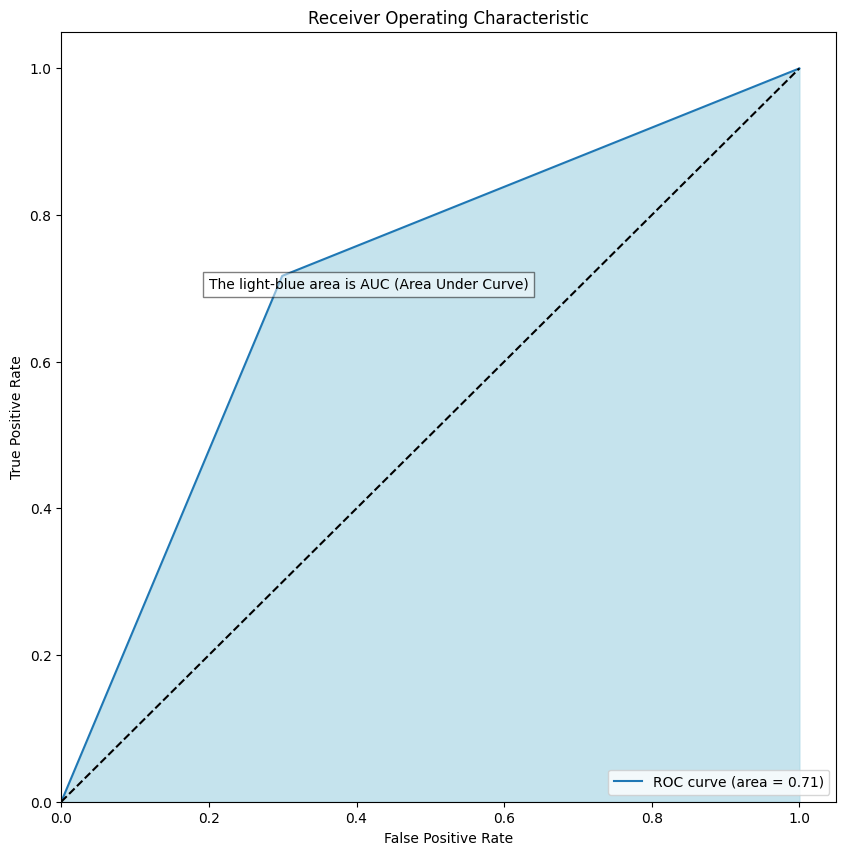

In [ ]:
# Compute the ROC curve
fpr, tpr, _ = roc_curve(holdout_y_en, y_scores)
roc_auc = auc(fpr, tpr)

# Print AUC value
print("AUC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='lightblue', alpha=0.7)  # Fill the area under the curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.text(0.2, 0.7, 'The light-blue area is AUC (Area Under Curve)', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


#### Decile Lift Chart

[How it comes] The Decile Lift Chart is constructed by dividing the dataset into ten equal parts, or deciles, based on the predicted probabilities (or scores) assigned by the classification model. The instances with the highest predicted probabilities are placed in the first decile, the next highest in the second decile, and so on, until the lowest predicted probabilities are placed in the tenth decile.

[How to read] The Decile Lift Chart plots the lift values for each decile, allowing for a visual assessment of the model's performance. Ideally, a good classification model will have higher lift values in the top deciles, indicating that it is effective at prioritizing instances with a higher likelihood of belonging to the target class.

Link: https://www.youtube.com/watch?v=bztJRGf-tDY

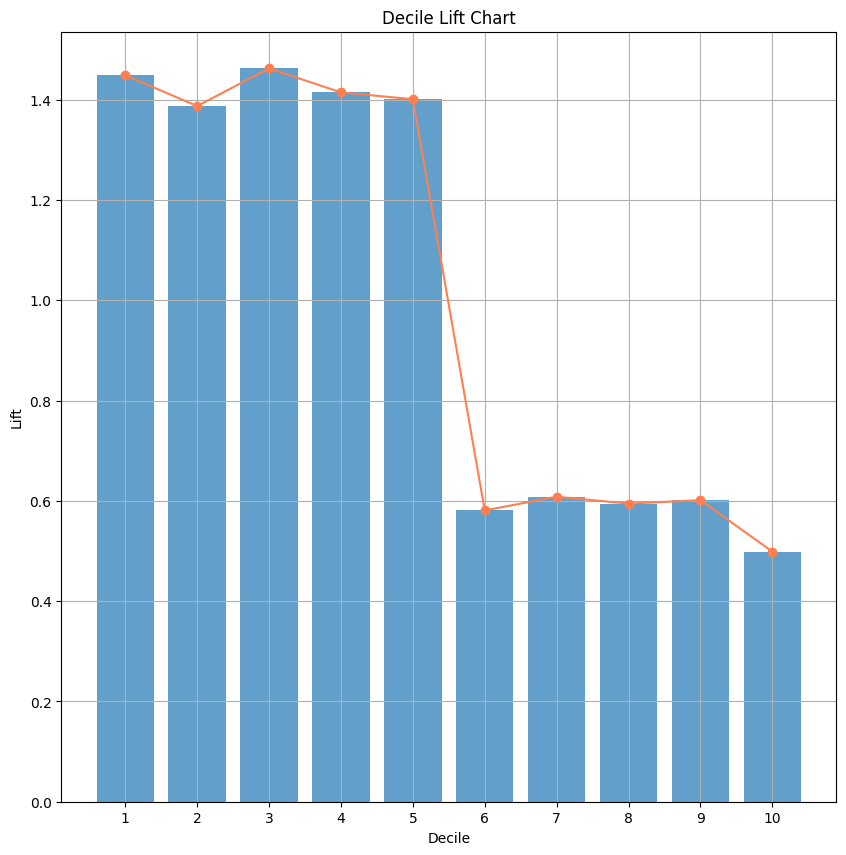

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe with true labels and predicted probabilities
data = pd.DataFrame({'actual': holdout_y_en, 'pred': y_scores})

# Sort the data by predicted probabilities
data = data.sort_values('pred', ascending=False)

# Calculate the number of samples in each decile
decile_size = int(len(data) / 10)

# Calculate the response rate in each decile
response_rates = []
for i in range(10):
    decile_data = data.iloc[i*decile_size:(i+1)*decile_size]
    response_rate = np.mean(decile_data['actual'])
    response_rates.append(response_rate)

# Calculate the overall response rate
overall_response_rate = np.mean(data['actual'])

# Calculate lift in each decile
lifts = [rate / overall_response_rate for rate in response_rates]

# Plot the Decile lift chart
plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), lifts, marker='o', color='coral')
plt.bar(range(1, 11), lifts, alpha=0.7)
plt.xticks(range(1, 11))
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.title('Decile Lift Chart')
plt.grid()
plt.show()


In [ ]:
print("You can't pass!!")

You can't pass!!


**Below is your assignment**

# **Assignment**:


## Q1: Re-run the provided example (Part 1~3) (30 points).

## Q2: In part 1, please replace the text with your data from your week 3 assignment by the following condition...(40 points)

  * You can earn up to 15 points if you apply it in part 1(POS), any technique will be okay. Please do POS and NER.
  * You can earn up to 10 points if you apply it in part 1(POS), using another technique in part 2. Please do POS and NER.
  * You can earn up to 15 points if you apply it in part 2(Tf-idf).

## Q3 Modify codes in the **sandbox section**, and answer the following questions to gain more points.(30 points)
  * **Question 1:** In step 1, please change the ratio of train set and holdout set. You can earn up to 5 points according to your feedback.
  * **Question 2:** In step 2-1 of part I, change the k-fold number according to your preference for several times, find the best k to your model. describe your finding from this tuning. What is the best combination of "test dataset ratio" & "Kfold number" that has the highest accuracy according to your observation? Please express how you find the combination and reason it might be. You can earn up to 15 points according to your feedback.
  * **Question 3:** In the Q3.3 section, when you change "feature number", will it influence the result of your best combination of "feature number", "test dataset ratio" & "Kfold number" that has the highest accuracy according to your observation? Please express your perspective why feature number change the result. (You only have to change one time, any number will be fine) You can earn up to 10 points based on your feedback.

* If your answer is same as another student's answer, your assignment score will be 0 points. Do not simply copy!!.

Your outcome:
* Put you student ID in the first line of your ipynb.
* Please specify which cells you do you modification to earn the extra points (10 points most)
* Hand out your colab link to **[eeclass]** platform. Please share it with "gildshen@iss.nthu.edu.tw" and  "ubo11185@gapp.nthu.edu.tw"
* If you have additional note, please put it in text cell in colab.
* Due date: before the next class.


# **Sandbox (TF-IDF vector)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#download data from google drive
import gdown
url = "https://drive.google.com/uc?id=1jbb0HQ9oTZkRNK055AvXD3ya8_ZLtN9o"
gdown.download(url,"Amazon_review.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1jbb0HQ9oTZkRNK055AvXD3ya8_ZLtN9o
To: /content/Amazon_review.csv
100%|██████████| 4.52M/4.52M [00:00<00:00, 83.0MB/s]


'Amazon_review.csv'

In [ ]:
#load dataset into pandas dataframe
amazon_reviewDF = pd.read_csv("Amazon_review.csv",delimiter=',',header = None)
amazon_reviewDF.columns=['text', 'label'] # name the column of dataframe
amazon_reviewDF

,text,label
0,Stuning even for the non-gamer: This sound tra...,Positive
1,The best soundtrack ever to anything.: I'm rea...,Positive
2,Amazing!: This soundtrack is my favorite music...,Positive
3,Excellent Soundtrack: I truly like this soundt...,Positive
4,"Remember, Pull Your Jaw Off The Floor After He...",Positive
...,...,...
9995,A revelation of life in small town America in ...,Positive
9996,Great biography of a very interesting journali...,Positive
9997,Interesting Subject; Poor Presentation: You'd ...,Negative
9998,Don't buy: The box looked used and it is obvio...,Negative


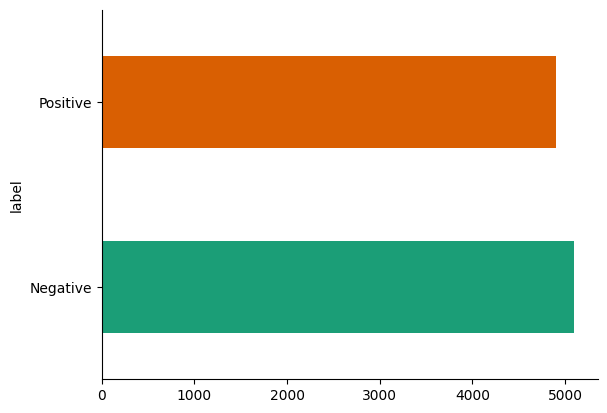

In [ ]:
# @title Data Visualization (Positive vs Negative)

from matplotlib import pyplot as plt
import seaborn as sns

amazon_reviewDF.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Q3.1: Split Training - Validation- Holdout(Test) dataset

In [ ]:
import numpy as np
from sklearn import model_selection, preprocessing, metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

We divide data into three data set by 70%, 30%

In [ ]:
# Split the dataset into 70% training data and 30% holdout data (Get the train dataset and holdout dataset)
Train_Dataset_ratio = 0.7
Holdout_Dataset_ratio = 0.3

train_x, holdout_x, train_y, holdout_y = model_selection.train_test_split(amazon_reviewDF['text'],amazon_reviewDF['label'],test_size=Holdout_Dataset_ratio,random_state=np.random.randint(100))

# The final dataset ratios will be 70% train, and 30% holdout.


Check if these three data sets are as we wish: Randomly distributed and Consisted as our allocation.

In [ ]:
train_x

,text
517,Sanity in Economics: This is economic sanity. ...
4309,Spare us: I purchased this CD for my wife for ...
894,American classic my ...: This completely predi...
5798,Not enough information. Cap did not fit my mod...
143,great gift: my brother in law was thrilled wit...
...,...
1460,Castle in the attic: This book was dull non fo...
1733,Interesting Story: Well the story was definite...
1760,Exactly what I was looking for: I was buying t...
485,Not what it claims to Be: I was actually looki...


In [ ]:
holdout_x

,text
3465,Icky lyrics!: Tubthumber was the reason I want...
2574,What a strange martial art: I would like to sa...
2223,Paranormal epic: This book is a rarity in UFO ...
4520,FRUSTRATED!: I had TWO of these products sent ...
9998,Don't buy: The box looked used and it is obvio...
...,...
8106,Razzle-Dazzle Special Effects and Nothing Else...
4725,Second 510 purchased in two years; both are ex...
3000,not playable since 1 hour 30 minutes: The DVD ...
3486,Very Good printer: I had a very hard time tryi...


## Q2: Change the number of Kfold to find out the best-fit classifier

What is the best combination of "test dataset ratio" & "Kfold number" that has the highest accuracy according to your observation? Please express how you find the combination and reason it might be.

### Step 2.1 Cross Validation with K-fold

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree,  metrics
from sklearn.model_selection import KFold

Define our own classifier: classifier_tree_f

In [ ]:
global_max_features = 1000

In [ ]:
def classifier_tree_f(train_x_f, valid_x_f, train_y_f, valid_y_f):
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    # encode the target variable, label Negative/Positive -> 0/1
    encoder_f = preprocessing.LabelEncoder()
    train_y_en_f = encoder_f.fit_transform(train_y_f)
    valid_y_en_f = encoder_f.fit_transform(valid_y_f)

    tfidf_vect_f = TfidfVectorizer(stop_words='english',  max_features = global_max_features)
    tfidf_vect_f.fit(train_x_f) #Learn vocabulary and idf from training data set.
    xtrain_tfidf_f =  tfidf_vect_f.transform(train_x_f) # compute tfidf for tranning data set
    xvalid_tfidf_f =  tfidf_vect_f.transform(valid_x_f) # compute tfidf for testing data set
    classifier_tree_f = tree.DecisionTreeClassifier(random_state=1)
    # fit(find out the model from) the training dataset on the classifier (if xtrain_tfidf_f is ... then the classification should be train_y_en_f  )
    classifier_tree_f = classifier_tree_f.fit(xtrain_tfidf_f, train_y_en_f)

    # predict the labels on validation dataset
    valid_y_pred_tree_f = classifier_tree_f.predict(xvalid_tfidf_f)

    # Get the accuracy score from this model
    accuracy_tree_f = metrics.accuracy_score(valid_y_en_f, valid_y_pred_tree_f)
    return accuracy_tree_f, classifier_tree_f

Validate through 10 folds of validation data set.

(It takes times~)

In [ ]:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_kfold = []
best_accuracy_tree = 0
KFOLD_NUM = 10

kf = KFold(n_splits=KFOLD_NUM, random_state=1,shuffle=True)

_train_x = train_x.to_numpy()
_train_y = train_y.to_numpy()


In [ ]:
for train_index, test_index in kf.split(_train_x):
    print(train_index)
    train_x_fold, valid_x_fold, train_y_fold, valid_y_fold = _train_x[train_index], _train_x[test_index], _train_y[train_index], _train_y[test_index]
    accuracy_tree, classifier_tree_tmp = classifier_tree_f(train_x_fold, valid_x_fold, train_y_fold, valid_y_fold)
    accuracy_kfold+=[accuracy_tree]

    if accuracy_tree > best_accuracy_tree:
      best_accuracy_tree = accuracy_tree
      best_classifier_tree = classifier_tree_tmp
      train_x_fold_best = train_x_fold
      train_y_fold_best = train_y_fold

[   0    1    2 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]
[   0    2    3 ... 6995 6996 6997]
[   0    1    2 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]
[   1    2    3 ... 6996 6998 6999]
[   0    1    3 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]


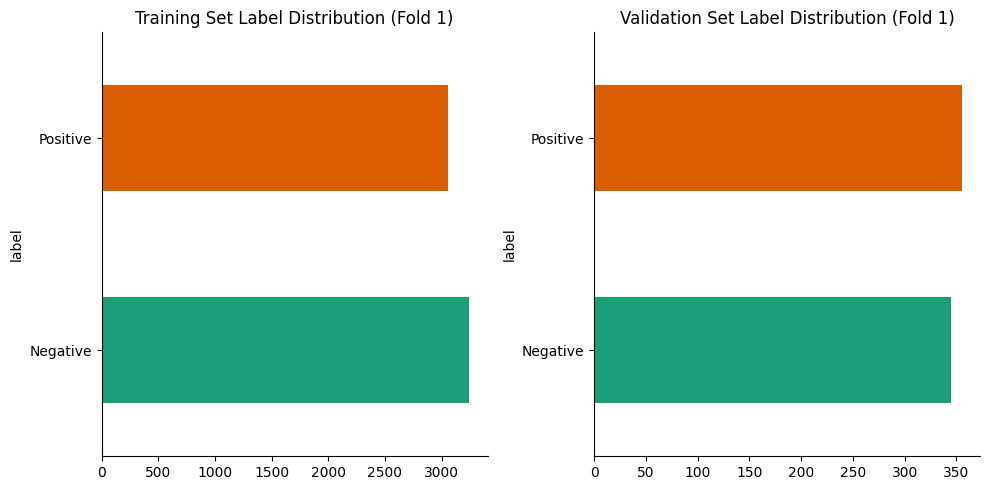

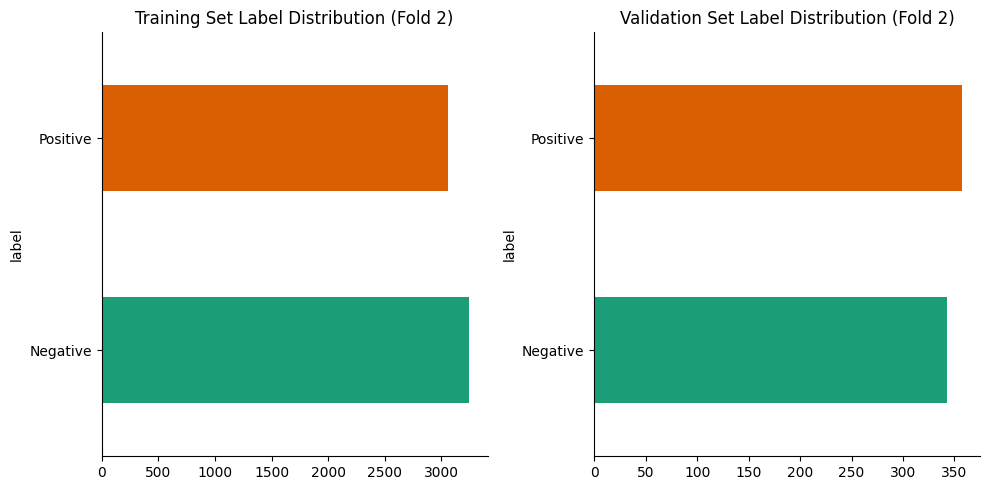

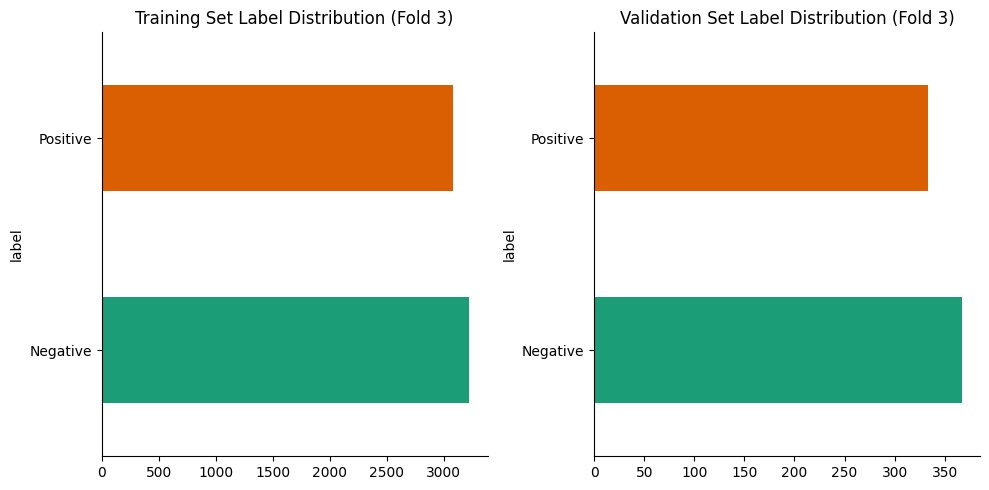

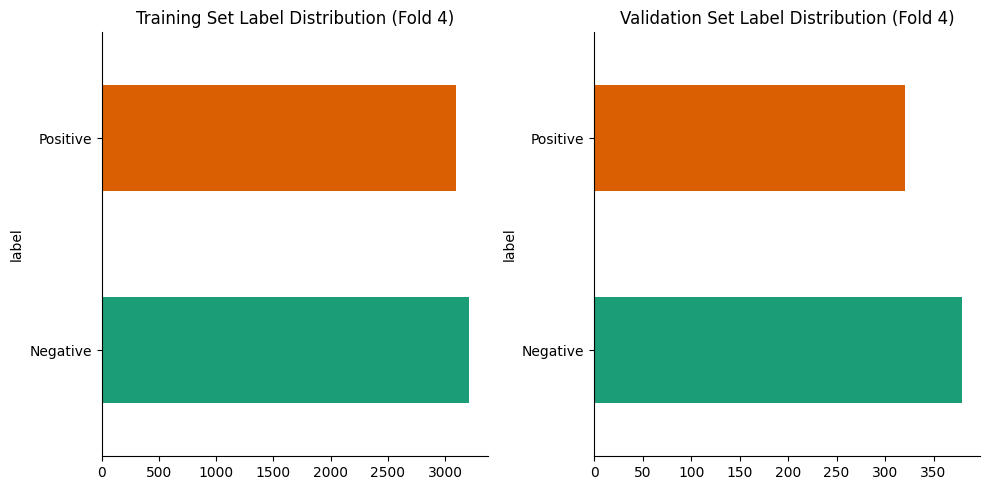

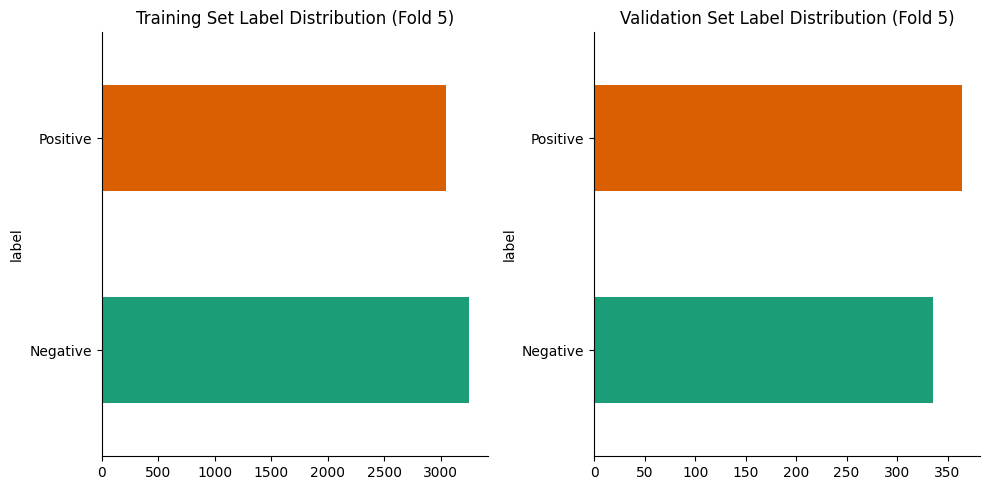

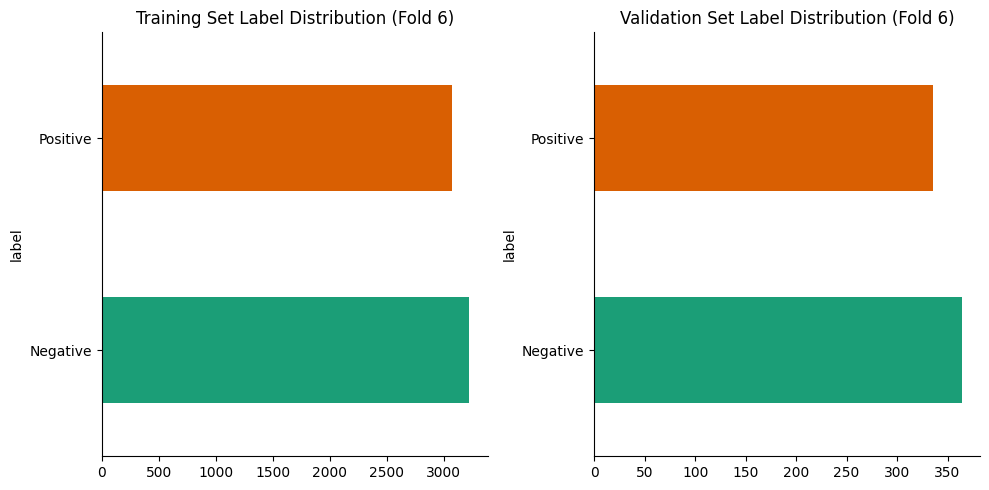

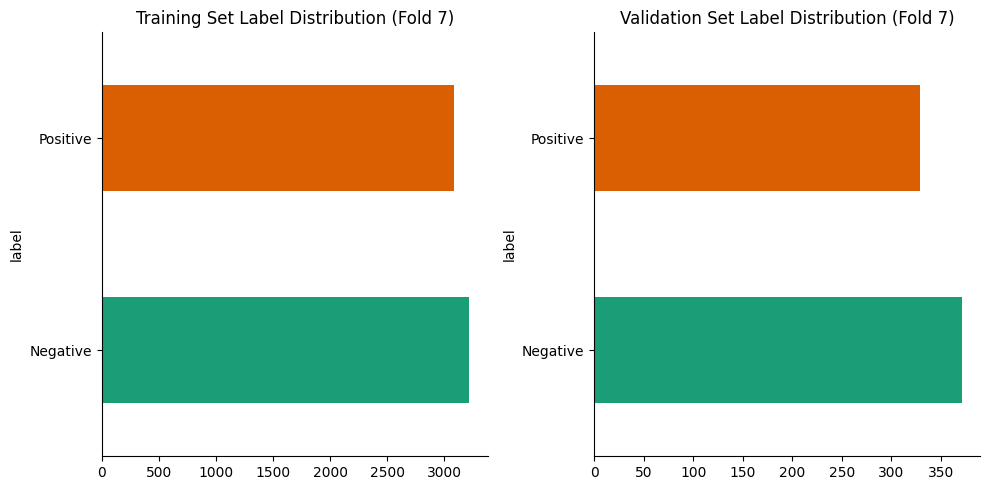

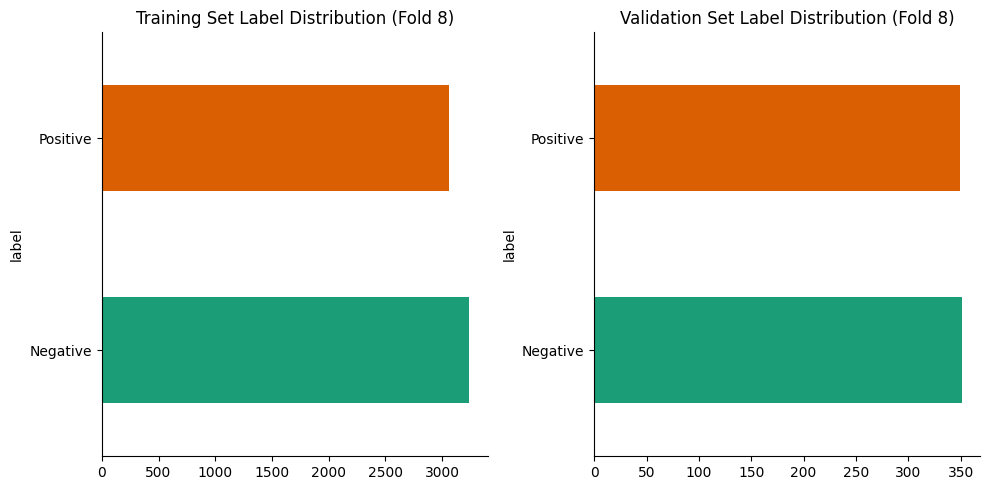

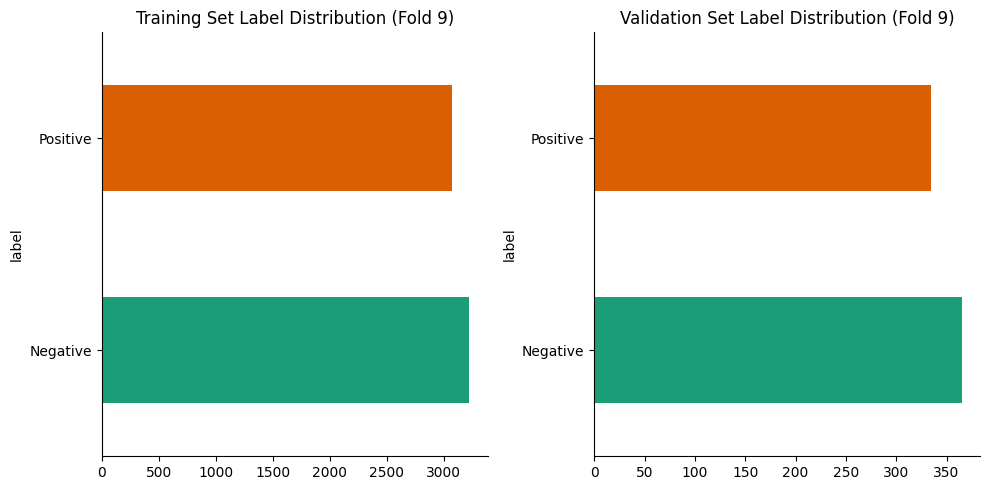

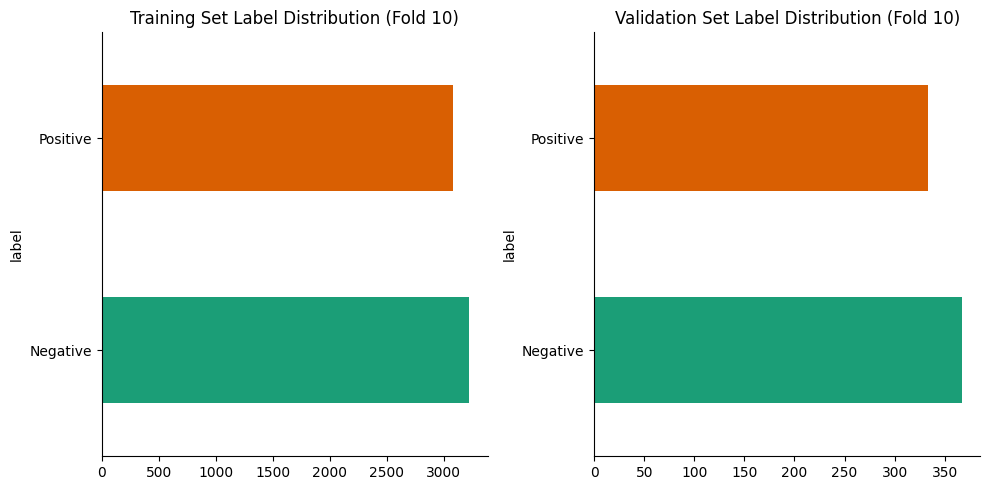

In [ ]:
kf_no=1
for train_index, test_index in kf.split(_train_x):

    # Convert train_y_fold and valid_y_fold to pandas Series for groupby
    train_y_fold = pd.Series(_train_y[train_index], name='label')
    valid_y_fold = pd.Series(_train_y[test_index], name='label')

    # Plotting the distribution of labels in training and validation sets
    plt.figure(figsize=(10, 5))  # Adjust figure size if needed

    plt.subplot(1, 2, 1)  # Create subplot for training set
    train_y_fold.groupby(train_y_fold).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
    plt.title(f'Training Set Label Distribution (Fold {kf_no})')
    plt.gca().spines[['top', 'right']].set_visible(False)

    plt.subplot(1, 2, 2)  # Create subplot for validation set
    valid_y_fold.groupby(valid_y_fold).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
    plt.title(f'Validation Set Label Distribution (Fold {kf_no})')
    plt.gca().spines[['top', 'right']].set_visible(False)

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

    kf_no+=1

In [ ]:
print(accuracy_kfold)
print(f"Accuracy kfold={KFOLD_NUM}", sum(accuracy_kfold)/len(accuracy_kfold))

[0.7185714285714285, 0.6971428571428572, 0.7114285714285714, 0.7014285714285714, 0.7242857142857143, 0.6828571428571428, 0.7171428571428572, 0.7171428571428572, 0.7257142857142858, 0.7171428571428572]
Accuracy kfold=10 0.7112857142857143


Find the model with highest accuracy as our best classifier!!

In [ ]:
# Find the best accuracy and its index
best_accuracy = max(accuracy_kfold)
best_index = accuracy_kfold.index(best_accuracy)

print(f"The best accuracy is {best_accuracy:.4f} in iteration {best_index + 1}")

The best accuracy is 0.7257 in iteration 9


### Step 2.2 Test the data with Holdout data set

In [ ]:
from sklearn import preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer

In the begining, you have to transform "label" in nominal into number (in our case, only 0 and 1)

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
# encode the target variable, label Negative/Positive -> 0/1
encoder = preprocessing.LabelEncoder()
train_y_en_fold = encoder.fit_transform(train_y_fold_best)
holdout_y_en = encoder.fit_transform(holdout_y)

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(stop_words='english',  max_features = global_max_features) #define method to do tfidf
tfidf_vect.fit(train_x_fold_best) #Learn vocabulary and compute idf from training data set. (in bag words)

# (Important) Due to our classifier in generated by data set from one of folds, we have to use the fold that is used by the classifier.
xtrain_tfidf_fold =  tfidf_vect.transform(train_x_fold_best) # compute tfidf for tranning data set
xholdout_tfidf =  tfidf_vect.transform(holdout_x) # compute tfidf for testing data set (holdout data set)

Noted: If we use K-fold Cross-Validation to select our best classifier, the whole training data set for rest evaluation process must use data set that generate(fit) the best model. Or you will have a incorrect result.

In this case, I store it as "train_x_fold_best" and "xtrain_tfidf_fold"

In [ ]:
tfidf_vect

TfidfVectorizer(max_features=1000, stop_words='english')

In [ ]:
# Display bag words
print(tfidf_vect.get_feature_names_out())

['10' '100' '12' '15' '1984' '20' '30' '3d' '40' '451' '50' '80' 'able'
 'absolutely' 'account' 'acting' 'action' 'actor' 'actors' 'actual'
 'actually' 'adam' 'adapter' 'add' 'addition' 'admit' 'adult' 'adventure'
 'advertised' 'advice' 'age' 'ago' 'agree' 'air' 'album' 'albums' 'alot'
 'amazing' 'amazon' 'america' 'american' 'annoying' 'anymore' 'apart'
 'appears' 'apple' 'appreciate' 'area' 'aren' 'arrived' 'art' 'artist'
 'asimov' 'ask' 'attempt' 'attention' 'audio' 'author' 'authors'
 'available' 'average' 'avoid' 'away' 'awesome' 'awful' 'baby'
 'background' 'bad' 'band' 'based' 'basic' 'basically' 'batteries'
 'battery' 'beat' 'beautiful' 'bed' 'beginning' 'believe' 'best' 'better'
 'beware' 'big' 'bit' 'black' 'blu' 'blue' 'body' 'book' 'books' 'boot'
 'boots' 'bored' 'boring' 'bother' 'bottle' 'bought' 'box' 'boy' 'boys'
 'bradbury' 'brain' 'brand' 'break' 'brilliant' 'bring' 'british' 'broke'
 'broken' 'brother' 'brought' 'brown' 'built' 'bunch' 'business' 'buy'
 'buying' 'cab

In [ ]:
# Display length of bag words
print(len(tfidf_vect.get_feature_names_out()))

1000


In [ ]:
print(train_x)

517     Sanity in Economics: This is economic sanity. ...
4309    Spare us: I purchased this CD for my wife for ...
894     American classic my ...: This completely predi...
5798    Not enough information. Cap did not fit my mod...
143     great gift: my brother in law was thrilled wit...
                              ...                        
1460    Castle in the attic: This book was dull non fo...
1733    Interesting Story: Well the story was definite...
1760    Exactly what I was looking for: I was buying t...
485     Not what it claims to Be: I was actually looki...
2105    Toby McGuyre Spider-Man suffers in comparison:...
Name: text, Length: 7000, dtype: object


In [ ]:
print(xtrain_tfidf_fold)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 113349 stored elements and shape (6300, 1000)>
  Coords	Values
  (0, 80)	0.25041361210581364
  (0, 88)	0.1650565258454699
  (0, 256)	0.3172117045810095
  (0, 257)	0.5078030837182139
  (0, 275)	0.3493953097066091
  (0, 372)	0.4484084658589024
  (0, 626)	0.2695188678886473
  (0, 697)	0.20276626729527814
  (0, 918)	0.33861529025027143
  (1, 30)	0.26436689204803787
  (1, 93)	0.2062861630813685
  (1, 130)	0.19146481872527635
  (1, 147)	0.23783432170457036
  (1, 155)	0.2568086225012771
  (1, 163)	0.21177368852549525
  (1, 204)	0.2057126863944094
  (1, 501)	0.12240320488553812
  (1, 509)	0.2631255169383541
  (1, 570)	0.28716116588539214
  (1, 586)	0.1784369414023338
  (1, 657)	0.3022777049789137
  (1, 683)	0.2186910117194147
  (1, 752)	0.18360294636462102
  (1, 908)	0.21746821274095737
  (1, 958)	0.33737389238380083
  :	:
  (6298, 257)	0.7465592855439146
  (6298, 294)	0.16556435938432643
  (6298, 312)	0.1516555821495434
  (6298, 37

In [ ]:
# Display word in the location 4679 of bag words
tfidf_vect.get_feature_names_out()[679]

'public'

In [ ]:
from sklearn import tree,  metrics

In [ ]:
classifier_tree_final = tree.DecisionTreeClassifier(random_state=1)

# Assign best_classifier_tree as our classifier and train
classifier_tree_final = best_classifier_tree

In [ ]:
# predict the labels on holdout dataset
holdout_y_pred_tree = classifier_tree_final.predict(xholdout_tfidf)
accuracy_tree = metrics.accuracy_score(holdout_y_en, holdout_y_pred_tree)


In [ ]:
confusion_matrix_tree = metrics.confusion_matrix(holdout_y_en, holdout_y_pred_tree, labels=[0,1])
print ("Accuracy", accuracy_tree)
print ("confusion_matrix\n", confusion_matrix_tree)

print ("    ")

print("Confusion Matrix:")
print("                Predicted")
print("                Negative   Positive")
print("Actual Negative    {}         {}".format(confusion_matrix_tree[0, 0], confusion_matrix_tree[0, 1]))
print("Actual Positive    {}         {}".format(confusion_matrix_tree[1, 0], confusion_matrix_tree[1, 1]))

precision = metrics.precision_score(holdout_y_en, holdout_y_pred_tree, pos_label=1)
recall = metrics.recall_score(holdout_y_en, holdout_y_pred_tree, pos_label=1)
print ("    ")
print("Precision:", precision)
print("Recall:", recall)


Accuracy 0.711
confusion_matrix
 [[1061  448]
 [ 419 1072]]
    
Confusion Matrix:
                Predicted
                Negative   Positive
Actual Negative    1061         448
Actual Positive    419         1072
    
Precision: 0.7052631578947368
Recall: 0.7189805499664654


In [ ]:
confusion_matrix_tree = metrics.confusion_matrix(holdout_y_en, holdout_y_pred_tree, labels=[1,0])

print ("Accuracy", accuracy_tree)
print ("Confusion Matrix\n", confusion_matrix_tree)
print ("    ")
# Print the confusion matrix with proper labels
print("Confusion Matrix:")
print("                  Predicted")
print("               Positive   Negative")
print("Actual Positive     {}         {}".format(confusion_matrix_tree[0, 0], confusion_matrix_tree[0, 1]))
print("       Negative     {}         {}".format(confusion_matrix_tree[1, 0], confusion_matrix_tree[1, 1]))

print ("    ")

# Extract counts from the confusion matrix for clarity
TP = confusion_matrix_tree[0, 0]  # True Positives: Actual positive and predicted positive
FN = confusion_matrix_tree[0, 1]  # False Negatives: Actual positive but predicted negative
FP = confusion_matrix_tree[1, 0]  # False Positives: Actual negative but predicted positive
TN = confusion_matrix_tree[1, 1]  # True Negatives: Actual negative and predicted negative

# For the Positive class:
# Here, we treat "Positive" (label 1) as the positive class for evaluation.
# Precision: the proportion of predicted positives that are actually positive.
#          Formula: TP / (TP + FP)
# Recall: the proportion of actual positives that were correctly predicted.
#         Formula: TP / (TP + FN)
precision = metrics.precision_score(holdout_y_en, holdout_y_pred_tree, pos_label=1)
recall = metrics.recall_score(holdout_y_en, holdout_y_pred_tree, pos_label=1)

# Print precision and recall values along with an explanation
print(f"Precision (Positive) Formula: TP / (TP + FP): {TP}/{TP}+{FP} = {precision}")
print(f"Recall (Positive) Formula: TP / (TP + FN): {TP}/{TP}+{FN} = {recall}")

precision_neg = metrics.precision_score(holdout_y_en, holdout_y_pred_tree, pos_label=0)
recall_neg = metrics.recall_score(holdout_y_en, holdout_y_pred_tree, pos_label=0)

# For the Negative class:
# Here, we treat "Negative" (label 0) as the positive class for evaluation.
# Precision (Negative) = TN / (TN + FN)
#   - Among all predicted negatives (TN + FN), the fraction that are truly negative (TN).
# Recall (Negative)    = TN / (TN + FP)
#   - Among all actual negatives (TN + FP), the fraction that are correctly predicted as negative (TN).
print("   ")
# Print the precision and recall values
print(f"Precision (Negative) Formula: TN / (TN + FN): {TN}/{TN}+{FN} = {precision_neg}")
print(f"Recall (Negative) Formula: TN / (TN + FP): {TN}/{TN}+{FP} = {recall_neg}")



Accuracy 0.711
Confusion Matrix
 [[1072  419]
 [ 448 1061]]
    
Confusion Matrix:
                  Predicted
               Positive   Negative
Actual Positive     1072         419
       Negative     448         1061
    
Precision (Positive) Formula: TP / (TP + FP): 1072/1072+448 = 0.7052631578947368
Recall (Positive) Formula: TP / (TP + FN): 1072/1072+419 = 0.7189805499664654
   
Precision (Negative) Formula: TN / (TN + FN): 1061/1061+419 = 0.7168918918918918
Recall (Negative) Formula: TN / (TN + FP): 1061/1061+448 = 0.7031146454605699


Let's check our classifier (You can modify sentence here)

In [ ]:
comment="This book is great. I like it very much."
comment_tfidf =  tfidf_vect.transform([comment])
comment_predictions = classifier_tree_final.predict(comment_tfidf)
print(comment_predictions)
print(encoder.inverse_transform(comment_predictions))

[1]
['Positive']


In [ ]:
comment="Boring book. It's weird, I am confusing about it"
comment_tfidf =  tfidf_vect.transform([comment])
comment_predictions = classifier_tree_final.predict(comment_tfidf)
print(comment_predictions)
print(encoder.inverse_transform(comment_predictions))

[0]
['Negative']


Hooray!!

### Step 2.3 Evaluation

#### ROC (Receiver Operating Characteristic) & AUC (Area Under Curve of ROC)

[How it comes] In text mining, we use ROC curve to help us to calculate the AUC evaluating the performance of classification models in text mining tasks, as it provides a single, interpretable value that reflects the model's ability to discriminate between classes across different thresholds.

[How to read] A higher AUC value indicates better classifier performance, as it represents the model's ability to correctly distinguish between classes. An AUC of 0.5 suggests that the model is performing no better than random chance, while an AUC of 1.0 signifies a perfect classifier.

Reference: https://www.youtube.com/watch?v=4jRBRDbJemM

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Get the predicted probabilities
y_scores = classifier_tree_final.predict_proba(xholdout_tfidf)[:, 1]

AUC: 0.7110475977135177


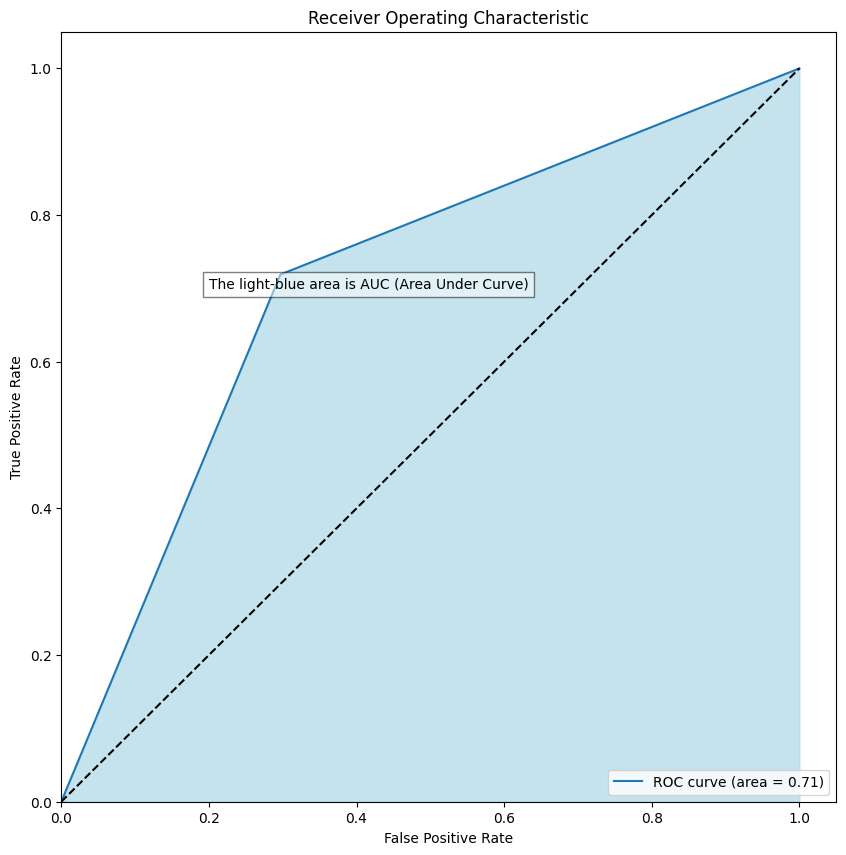

In [ ]:
# Compute the ROC curve
fpr, tpr, _ = roc_curve(holdout_y_en, y_scores)
roc_auc = auc(fpr, tpr)

# Print AUC value
print("AUC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='lightblue', alpha=0.7)  # Fill the area under the curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.text(0.2, 0.7, 'The light-blue area is AUC (Area Under Curve)', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


#### Decile Lift Chart

[How it comes] The Decile Lift Chart is constructed by dividing the dataset into ten equal parts, or deciles, based on the predicted probabilities (or scores) assigned by the classification model. The instances with the highest predicted probabilities are placed in the first decile, the next highest in the second decile, and so on, until the lowest predicted probabilities are placed in the tenth decile.

[How to read] The Decile Lift Chart plots the lift values for each decile, allowing for a visual assessment of the model's performance. Ideally, a good classification model will have higher lift values in the top deciles, indicating that it is effective at prioritizing instances with a higher likelihood of belonging to the target class.

Link: https://www.youtube.com/watch?v=bztJRGf-tDY

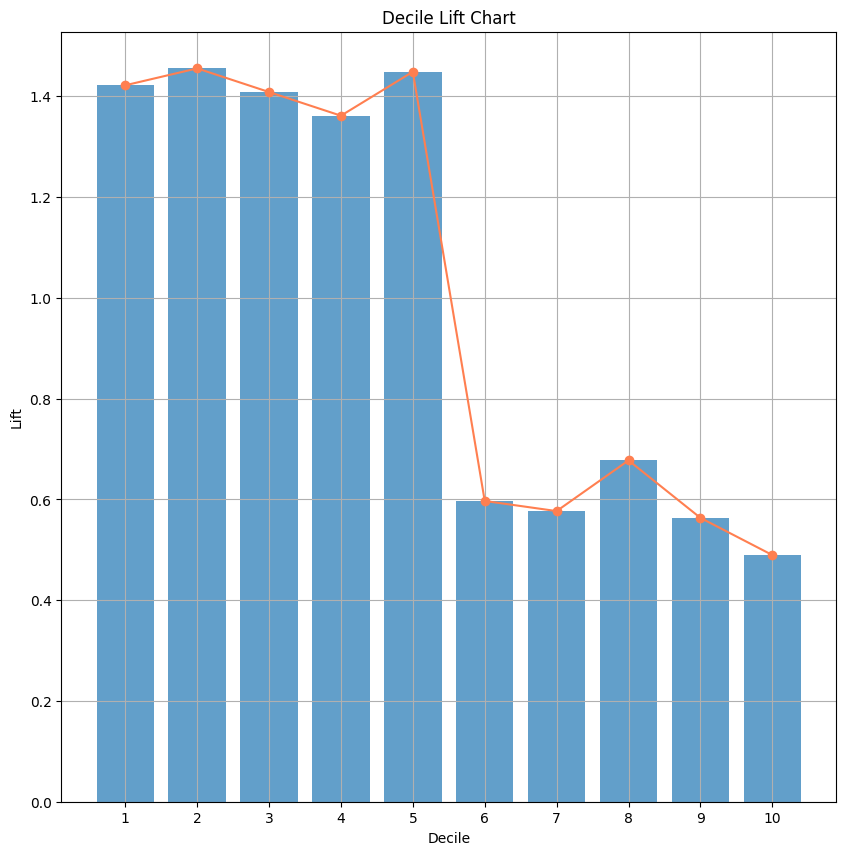

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe with true labels and predicted probabilities
data = pd.DataFrame({'actual': holdout_y_en, 'pred': y_scores})

# Sort the data by predicted probabilities
data = data.sort_values('pred', ascending=False)

# Calculate the number of samples in each decile
decile_size = int(len(data) / 10)

# Calculate the response rate in each decile
response_rates = []
for i in range(10):
    decile_data = data.iloc[i*decile_size:(i+1)*decile_size]
    response_rate = np.mean(decile_data['actual'])
    response_rates.append(response_rate)

# Calculate the overall response rate
overall_response_rate = np.mean(data['actual'])

# Calculate lift in each decile
lifts = [rate / overall_response_rate for rate in response_rates]

# Plot the Decile lift chart
plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), lifts, marker='o', color='coral')
plt.bar(range(1, 11), lifts, alpha=0.7)
plt.xticks(range(1, 11))
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.title('Decile Lift Chart')
plt.grid()
plt.show()


### Your answer of Q3.2

## Q3.3 Change the feature number

When you change "feature number", will it influence the result of your best combination of "feature number", "test dataset ratio" & "Kfold number" that has the highest accuracy according to your observation? Please express your perspective why feature number change the result. (You only have to change one time, any number will be fine)

Define our own classifier: classifier_tree_f

In [ ]:
global_max_features = 1000

In [ ]:
def classifier_tree_f(train_x_f, valid_x_f, train_y_f, valid_y_f):
    # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
    # encode the target variable, label Negative/Positive -> 0/1
    encoder_f = preprocessing.LabelEncoder()
    train_y_en_f = encoder_f.fit_transform(train_y_f)
    valid_y_en_f = encoder_f.fit_transform(valid_y_f)

    tfidf_vect_f = TfidfVectorizer(stop_words='english',  max_features = global_max_features)
    tfidf_vect_f.fit(train_x_f) #Learn vocabulary and idf from training data set.
    xtrain_tfidf_f =  tfidf_vect_f.transform(train_x_f) # compute tfidf for tranning data set
    xvalid_tfidf_f =  tfidf_vect_f.transform(valid_x_f) # compute tfidf for testing data set
    classifier_tree_f = tree.DecisionTreeClassifier(random_state=1)
    # fit(find out the model from) the training dataset on the classifier (if xtrain_tfidf_f is ... then the classification should be train_y_en_f  )
    classifier_tree_f = classifier_tree_f.fit(xtrain_tfidf_f, train_y_en_f)

    # predict the labels on validation dataset
    valid_y_pred_tree_f = classifier_tree_f.predict(xvalid_tfidf_f)

    # Get the accuracy score from this model
    accuracy_tree_f = metrics.accuracy_score(valid_y_en_f, valid_y_pred_tree_f)
    return accuracy_tree_f, classifier_tree_f

Validate through 10 folds of validation data set.

(It takes times~)

In [ ]:
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_kfold = []
best_accuracy_tree = 0
KFOLD_NUM = 10

kf = KFold(n_splits=KFOLD_NUM, random_state=1,shuffle=True)

_train_x = train_x.to_numpy()
_train_y = train_y.to_numpy()


In [ ]:
for train_index, test_index in kf.split(_train_x):
    print(train_index)
    train_x_fold, valid_x_fold, train_y_fold, valid_y_fold = _train_x[train_index], _train_x[test_index], _train_y[train_index], _train_y[test_index]
    accuracy_tree, classifier_tree_tmp = classifier_tree_f(train_x_fold, valid_x_fold, train_y_fold, valid_y_fold)
    accuracy_kfold+=[accuracy_tree]

    if accuracy_tree > best_accuracy_tree:
      best_accuracy_tree = accuracy_tree
      best_classifier_tree = classifier_tree_tmp
      train_x_fold_best = train_x_fold
      train_y_fold_best = train_y_fold

[   0    1    2 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]
[   0    2    3 ... 6995 6996 6997]
[   0    1    2 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]
[   1    2    3 ... 6996 6998 6999]
[   0    1    3 ... 6997 6998 6999]
[   0    1    2 ... 6997 6998 6999]


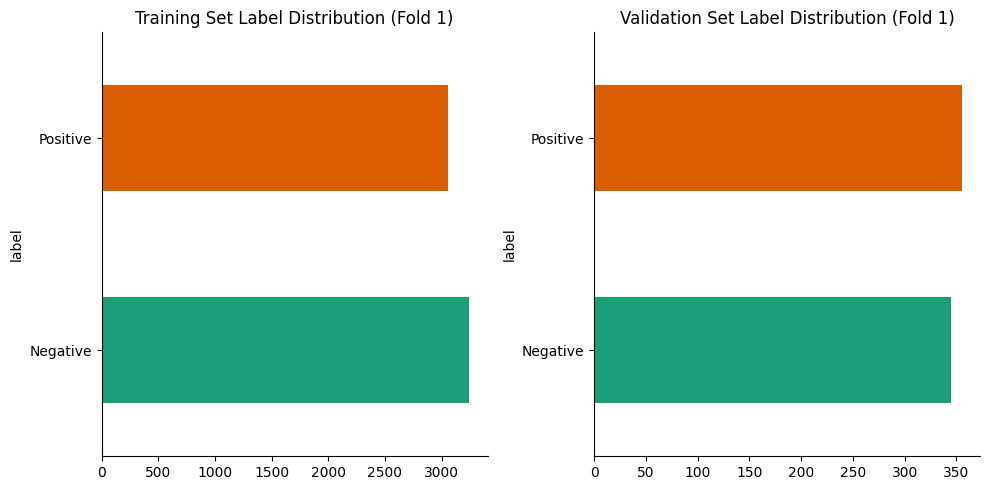

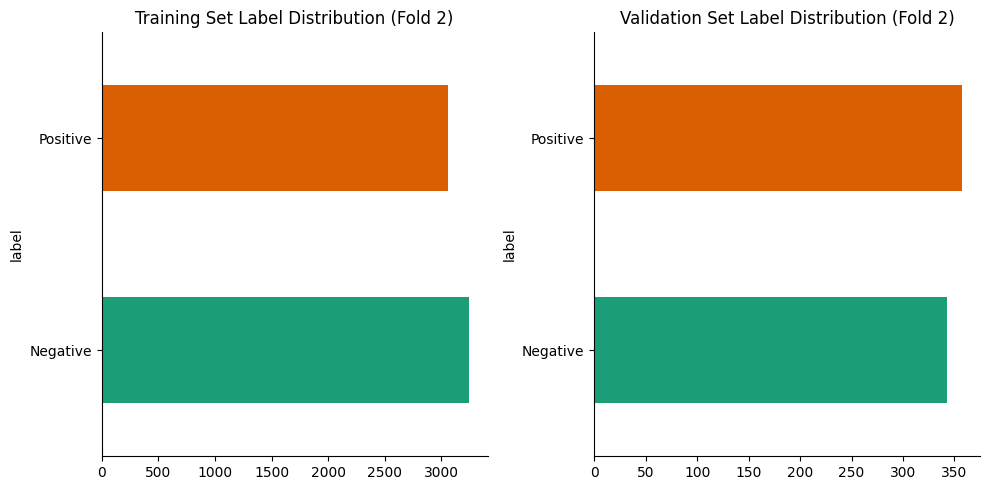

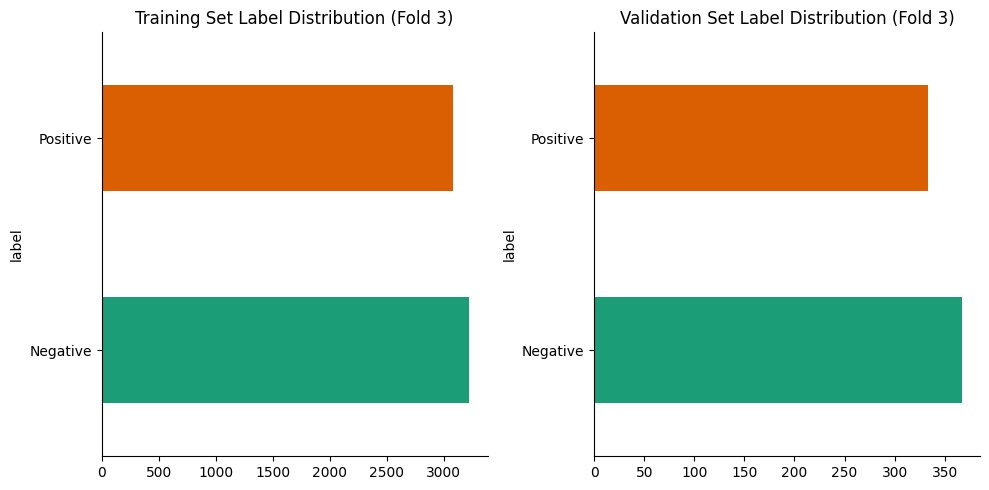

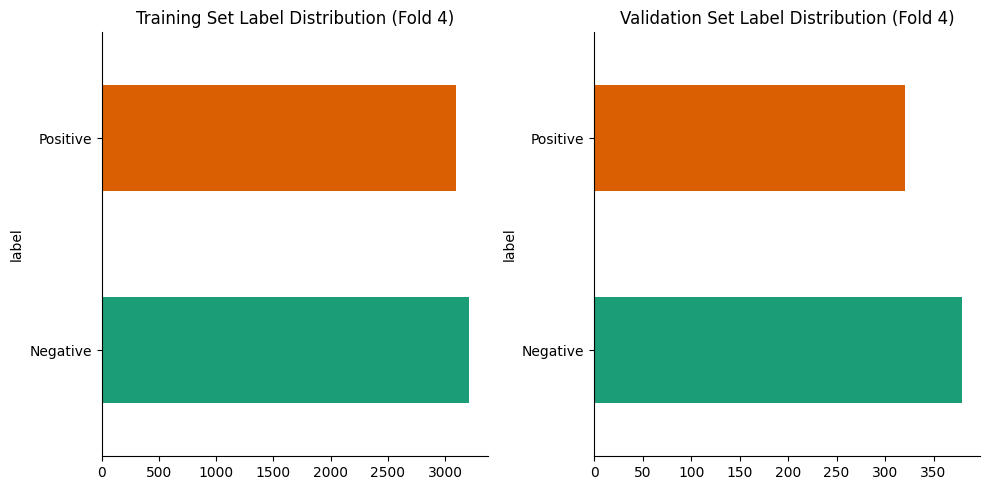

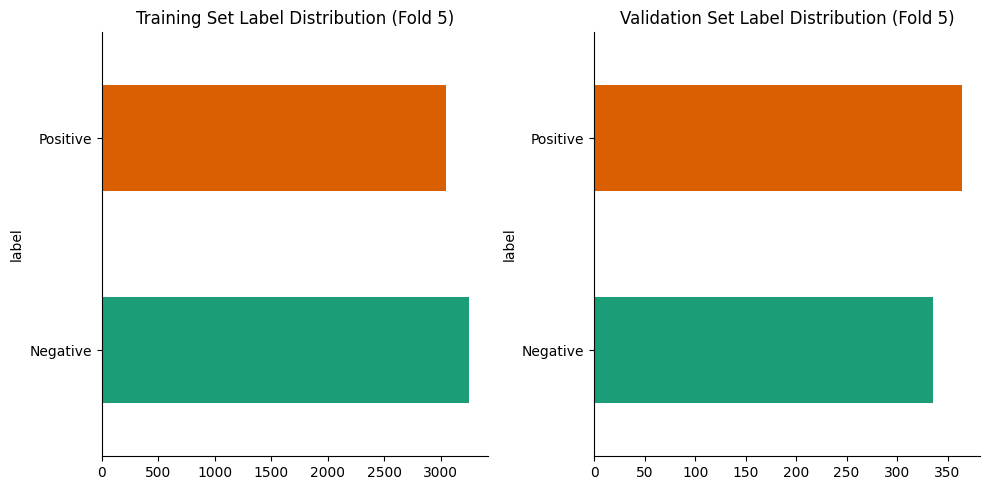

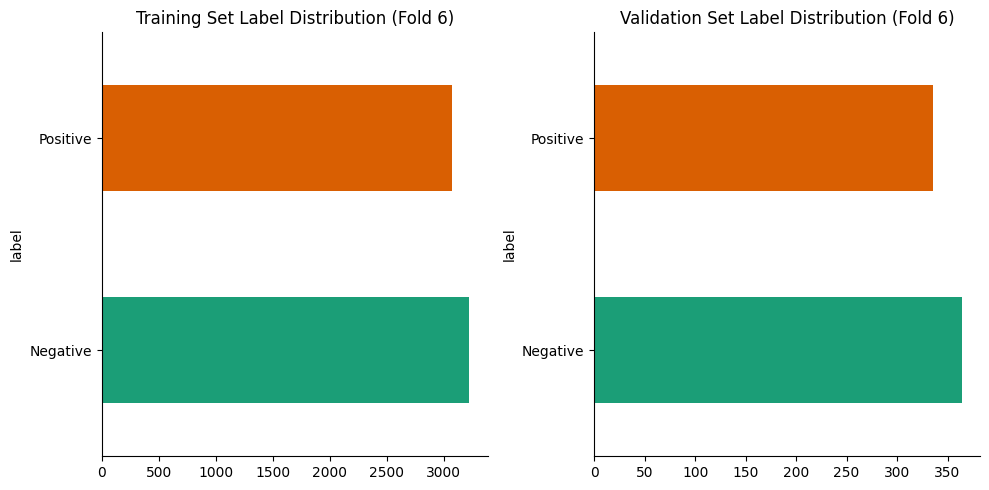

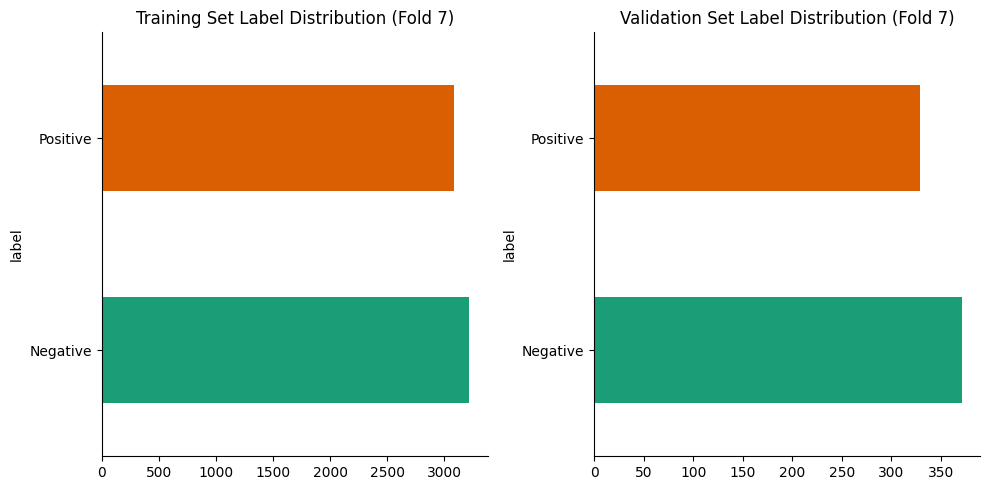

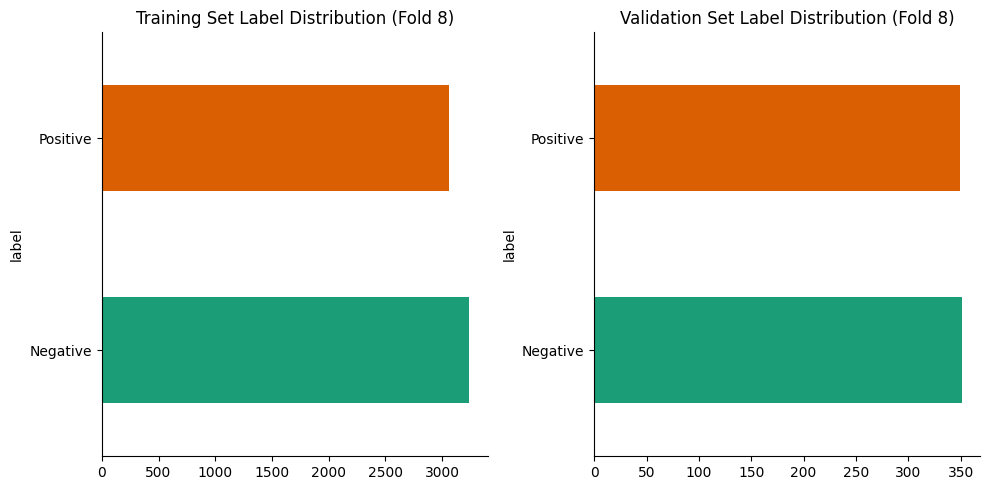

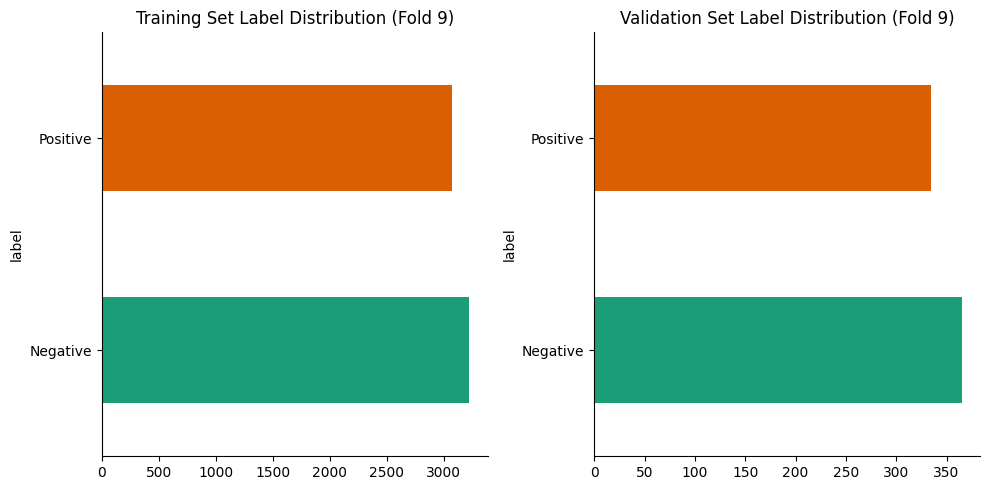

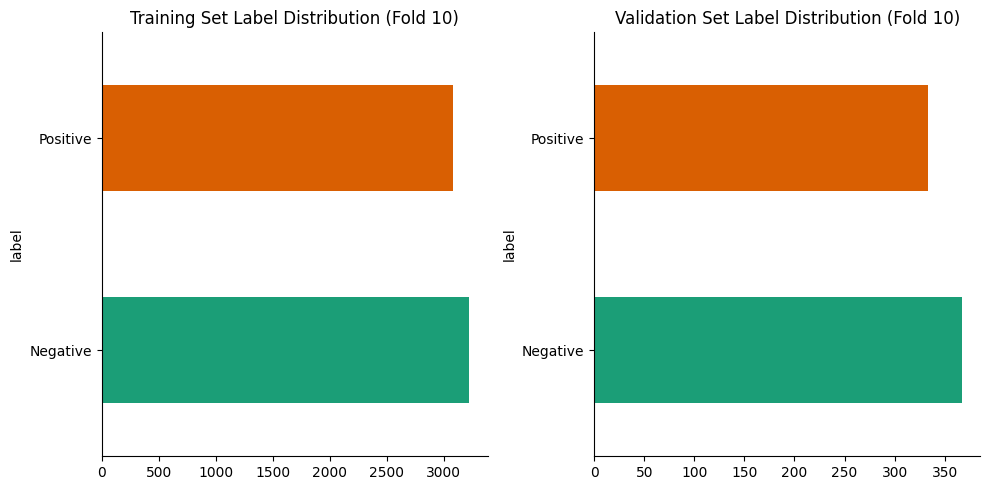

In [ ]:
kf_no=1
for train_index, test_index in kf.split(_train_x):

    # Convert train_y_fold and valid_y_fold to pandas Series for groupby
    train_y_fold = pd.Series(_train_y[train_index], name='label')
    valid_y_fold = pd.Series(_train_y[test_index], name='label')

    # Plotting the distribution of labels in training and validation sets
    plt.figure(figsize=(10, 5))  # Adjust figure size if needed

    plt.subplot(1, 2, 1)  # Create subplot for training set
    train_y_fold.groupby(train_y_fold).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
    plt.title(f'Training Set Label Distribution (Fold {kf_no})')
    plt.gca().spines[['top', 'right']].set_visible(False)

    plt.subplot(1, 2, 2)  # Create subplot for validation set
    valid_y_fold.groupby(valid_y_fold).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
    plt.title(f'Validation Set Label Distribution (Fold {kf_no})')
    plt.gca().spines[['top', 'right']].set_visible(False)

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

    kf_no+=1

In [ ]:
print(accuracy_kfold)
print(len(accuracy_kfold))
print(f"Accuracy kfold={KFOLD_NUM}", sum(accuracy_kfold)/len(accuracy_kfold))

[0.7185714285714285, 0.6971428571428572, 0.7114285714285714, 0.7014285714285714, 0.7242857142857143, 0.6828571428571428, 0.7171428571428572, 0.7171428571428572, 0.7257142857142858, 0.7171428571428572]
10
Accuracy kfold=10 0.7112857142857143


Find the model with highest accuracy as our best classifier!!

In [ ]:
# Find the best accuracy and its index
best_accuracy = max(accuracy_kfold)
best_index = accuracy_kfold.index(best_accuracy)

print(f"The best accuracy is {best_accuracy:.4f} in iteration {best_index + 1}")

The best accuracy is 0.7257 in iteration 9


### Step 2.2 Test the data with Holdout data set

In [ ]:
from sklearn import preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer

In the begining, you have to transform "label" in nominal into number (in our case, only 0 and 1)

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
# encode the target variable, label Negative/Positive -> 0/1
encoder = preprocessing.LabelEncoder()
train_y_en_fold = encoder.fit_transform(train_y_fold_best)
holdout_y_en = encoder.fit_transform(holdout_y)

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(stop_words='english',  max_features = global_max_features) #define method to do tfidf
tfidf_vect.fit(train_x_fold_best) #Learn vocabulary and compute idf from training data set. (in bag words)

# (Important) Due to our classifier in generated by data set from one of folds, we have to use the fold that is used by the classifier.
xtrain_tfidf_fold =  tfidf_vect.transform(train_x_fold_best) # compute tfidf for tranning data set
xholdout_tfidf =  tfidf_vect.transform(holdout_x) # compute tfidf for testing data set (holdout data set)

Noted: If we use K-fold Cross-Validation to select our best classifier, the whole training data set for rest evaluation process must use data set that generate(fit) the best model. Or you will have a incorrect result.

In this case, I store it as "train_x_fold_best" and "xtrain_tfidf_fold"

In [ ]:
tfidf_vect

TfidfVectorizer(max_features=1000, stop_words='english')

In [ ]:
# Display bag words
print(tfidf_vect.get_feature_names_out())

['10' '100' '12' '15' '1984' '20' '30' '3d' '40' '451' '50' '80' 'able'
 'absolutely' 'account' 'acting' 'action' 'actor' 'actors' 'actual'
 'actually' 'adam' 'adapter' 'add' 'addition' 'admit' 'adult' 'adventure'
 'advertised' 'advice' 'age' 'ago' 'agree' 'air' 'album' 'albums' 'alot'
 'amazing' 'amazon' 'america' 'american' 'annoying' 'anymore' 'apart'
 'appears' 'apple' 'appreciate' 'area' 'aren' 'arrived' 'art' 'artist'
 'asimov' 'ask' 'attempt' 'attention' 'audio' 'author' 'authors'
 'available' 'average' 'avoid' 'away' 'awesome' 'awful' 'baby'
 'background' 'bad' 'band' 'based' 'basic' 'basically' 'batteries'
 'battery' 'beat' 'beautiful' 'bed' 'beginning' 'believe' 'best' 'better'
 'beware' 'big' 'bit' 'black' 'blu' 'blue' 'body' 'book' 'books' 'boot'
 'boots' 'bored' 'boring' 'bother' 'bottle' 'bought' 'box' 'boy' 'boys'
 'bradbury' 'brain' 'brand' 'break' 'brilliant' 'bring' 'british' 'broke'
 'broken' 'brother' 'brought' 'brown' 'built' 'bunch' 'business' 'buy'
 'buying' 'cab

In [ ]:
# Display length of bag words
print(len(tfidf_vect.get_feature_names_out()))

1000


In [ ]:
print(train_x)

517     Sanity in Economics: This is economic sanity. ...
4309    Spare us: I purchased this CD for my wife for ...
894     American classic my ...: This completely predi...
5798    Not enough information. Cap did not fit my mod...
143     great gift: my brother in law was thrilled wit...
                              ...                        
1460    Castle in the attic: This book was dull non fo...
1733    Interesting Story: Well the story was definite...
1760    Exactly what I was looking for: I was buying t...
485     Not what it claims to Be: I was actually looki...
2105    Toby McGuyre Spider-Man suffers in comparison:...
Name: text, Length: 7000, dtype: object


In [ ]:
print(xtrain_tfidf_fold)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 113349 stored elements and shape (6300, 1000)>
  Coords	Values
  (0, 80)	0.25041361210581364
  (0, 88)	0.1650565258454699
  (0, 256)	0.3172117045810095
  (0, 257)	0.5078030837182139
  (0, 275)	0.3493953097066091
  (0, 372)	0.4484084658589024
  (0, 626)	0.2695188678886473
  (0, 697)	0.20276626729527814
  (0, 918)	0.33861529025027143
  (1, 30)	0.26436689204803787
  (1, 93)	0.2062861630813685
  (1, 130)	0.19146481872527635
  (1, 147)	0.23783432170457036
  (1, 155)	0.2568086225012771
  (1, 163)	0.21177368852549525
  (1, 204)	0.2057126863944094
  (1, 501)	0.12240320488553812
  (1, 509)	0.2631255169383541
  (1, 570)	0.28716116588539214
  (1, 586)	0.1784369414023338
  (1, 657)	0.3022777049789137
  (1, 683)	0.2186910117194147
  (1, 752)	0.18360294636462102
  (1, 908)	0.21746821274095737
  (1, 958)	0.33737389238380083
  :	:
  (6298, 257)	0.7465592855439146
  (6298, 294)	0.16556435938432643
  (6298, 312)	0.1516555821495434
  (6298, 37

In [ ]:
# Display word in the location 4679 of bag words
tfidf_vect.get_feature_names_out()[679]

'public'

In [ ]:
from sklearn import tree,  metrics

In [ ]:
classifier_tree_final = tree.DecisionTreeClassifier(random_state=1)

# Assign best_classifier_tree as our classifier and train
classifier_tree_final = best_classifier_tree

In [ ]:
# predict the labels on holdout dataset
holdout_y_pred_tree = classifier_tree_final.predict(xholdout_tfidf)
accuracy_tree = metrics.accuracy_score(holdout_y_en, holdout_y_pred_tree)


In [ ]:
confusion_matrix_tree = metrics.confusion_matrix(holdout_y_en, holdout_y_pred_tree, labels=[0,1])
print ("Accuracy", accuracy_tree)
print ("confusion_matrix\n", confusion_matrix_tree)

print ("    ")

print("Confusion Matrix:")
print("                Predicted")
print("                Negative   Positive")
print("Actual Negative    {}         {}".format(confusion_matrix_tree[0, 0], confusion_matrix_tree[0, 1]))
print("Actual Positive    {}         {}".format(confusion_matrix_tree[1, 0], confusion_matrix_tree[1, 1]))

precision = metrics.precision_score(holdout_y_en, holdout_y_pred_tree, pos_label=1)
recall = metrics.recall_score(holdout_y_en, holdout_y_pred_tree, pos_label=1)
print ("    ")
print("Precision:", precision)
print("Recall:", recall)


Accuracy 0.711
confusion_matrix
 [[1061  448]
 [ 419 1072]]
    
Confusion Matrix:
                Predicted
                Negative   Positive
Actual Negative    1061         448
Actual Positive    419         1072
    
Precision: 0.7052631578947368
Recall: 0.7189805499664654


In [ ]:
confusion_matrix_tree = metrics.confusion_matrix(holdout_y_en, holdout_y_pred_tree, labels=[1,0])

print ("Accuracy", accuracy_tree)
print ("Confusion Matrix\n", confusion_matrix_tree)
print ("    ")
# Print the confusion matrix with proper labels
print("Confusion Matrix:")
print("                  Predicted")
print("               Positive   Negative")
print("Actual Positive     {}         {}".format(confusion_matrix_tree[0, 0], confusion_matrix_tree[0, 1]))
print("       Negative     {}         {}".format(confusion_matrix_tree[1, 0], confusion_matrix_tree[1, 1]))

print ("    ")

# Extract counts from the confusion matrix for clarity
TP = confusion_matrix_tree[0, 0]  # True Positives: Actual positive and predicted positive
FN = confusion_matrix_tree[0, 1]  # False Negatives: Actual positive but predicted negative
FP = confusion_matrix_tree[1, 0]  # False Positives: Actual negative but predicted positive
TN = confusion_matrix_tree[1, 1]  # True Negatives: Actual negative and predicted negative

# For the Positive class:
# Here, we treat "Positive" (label 1) as the positive class for evaluation.
# Precision: the proportion of predicted positives that are actually positive.
#          Formula: TP / (TP + FP)
# Recall: the proportion of actual positives that were correctly predicted.
#         Formula: TP / (TP + FN)
precision = metrics.precision_score(holdout_y_en, holdout_y_pred_tree, pos_label=1)
recall = metrics.recall_score(holdout_y_en, holdout_y_pred_tree, pos_label=1)

# Print precision and recall values along with an explanation
print(f"Precision (Positive) Formula: TP / (TP + FP): {TP}/{TP}+{FP} = {precision}")
print(f"Recall (Positive) Formula: TP / (TP + FN): {TP}/{TP}+{FN} = {recall}")

precision_neg = metrics.precision_score(holdout_y_en, holdout_y_pred_tree, pos_label=0)
recall_neg = metrics.recall_score(holdout_y_en, holdout_y_pred_tree, pos_label=0)

# For the Negative class:
# Here, we treat "Negative" (label 0) as the positive class for evaluation.
# Precision (Negative) = TN / (TN + FN)
#   - Among all predicted negatives (TN + FN), the fraction that are truly negative (TN).
# Recall (Negative)    = TN / (TN + FP)
#   - Among all actual negatives (TN + FP), the fraction that are correctly predicted as negative (TN).
print("   ")
# Print the precision and recall values
print(f"Precision (Negative) Formula: TN / (TN + FN): {TN}/{TN}+{FN} = {precision_neg}")
print(f"Recall (Negative) Formula: TN / (TN + FP): {TN}/{TN}+{FP} = {recall_neg}")



Accuracy 0.711
Confusion Matrix
 [[1072  419]
 [ 448 1061]]
    
Confusion Matrix:
                  Predicted
               Positive   Negative
Actual Positive     1072         419
       Negative     448         1061
    
Precision (Positive) Formula: TP / (TP + FP): 1072/1072+448 = 0.7052631578947368
Recall (Positive) Formula: TP / (TP + FN): 1072/1072+419 = 0.7189805499664654
   
Precision (Negative) Formula: TN / (TN + FN): 1061/1061+419 = 0.7168918918918918
Recall (Negative) Formula: TN / (TN + FP): 1061/1061+448 = 0.7031146454605699


Let's check our classifier (You can modify sentence here)

In [ ]:
comment="This book is great. I like it very much."
comment_tfidf =  tfidf_vect.transform([comment])
comment_predictions = classifier_tree_final.predict(comment_tfidf)
print(comment_predictions)
print(encoder.inverse_transform(comment_predictions))

[1]
['Positive']


In [ ]:
comment="Boring book. It's weird, I am confusing about it"
comment_tfidf =  tfidf_vect.transform([comment])
comment_predictions = classifier_tree_final.predict(comment_tfidf)
print(comment_predictions)
print(encoder.inverse_transform(comment_predictions))

[0]
['Negative']


Hooray!!

### Step 2.3 Evaluation

#### ROC (Receiver Operating Characteristic) & AUC (Area Under Curve of ROC)

[How it comes] In text mining, we use ROC curve to help us to calculate the AUC evaluating the performance of classification models in text mining tasks, as it provides a single, interpretable value that reflects the model's ability to discriminate between classes across different thresholds.

[How to read] A higher AUC value indicates better classifier performance, as it represents the model's ability to correctly distinguish between classes. An AUC of 0.5 suggests that the model is performing no better than random chance, while an AUC of 1.0 signifies a perfect classifier.

Reference: https://www.youtube.com/watch?v=4jRBRDbJemM

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Get the predicted probabilities
y_scores = classifier_tree_final.predict_proba(xholdout_tfidf)[:, 1]

AUC: 0.7110475977135177


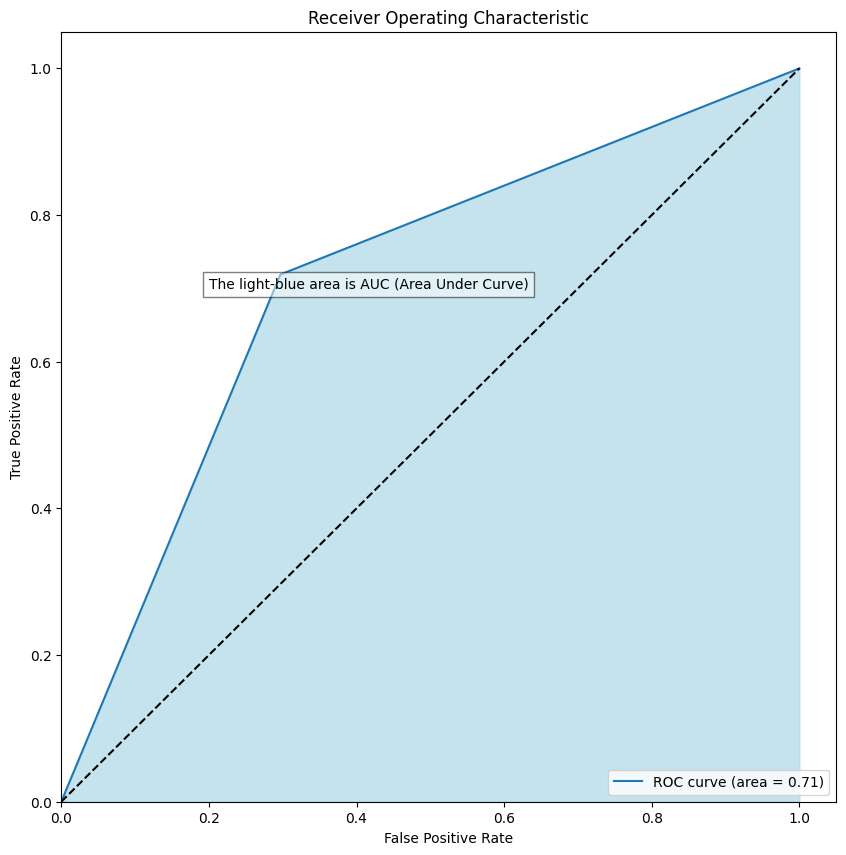

In [ ]:
# Compute the ROC curve
fpr, tpr, _ = roc_curve(holdout_y_en, y_scores)
roc_auc = auc(fpr, tpr)

# Print AUC value
print("AUC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='lightblue', alpha=0.7)  # Fill the area under the curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.text(0.2, 0.7, 'The light-blue area is AUC (Area Under Curve)', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


#### Decile Lift Chart

[How it comes] The Decile Lift Chart is constructed by dividing the dataset into ten equal parts, or deciles, based on the predicted probabilities (or scores) assigned by the classification model. The instances with the highest predicted probabilities are placed in the first decile, the next highest in the second decile, and so on, until the lowest predicted probabilities are placed in the tenth decile.

[How to read] The Decile Lift Chart plots the lift values for each decile, allowing for a visual assessment of the model's performance. Ideally, a good classification model will have higher lift values in the top deciles, indicating that it is effective at prioritizing instances with a higher likelihood of belonging to the target class.

Link: https://www.youtube.com/watch?v=bztJRGf-tDY

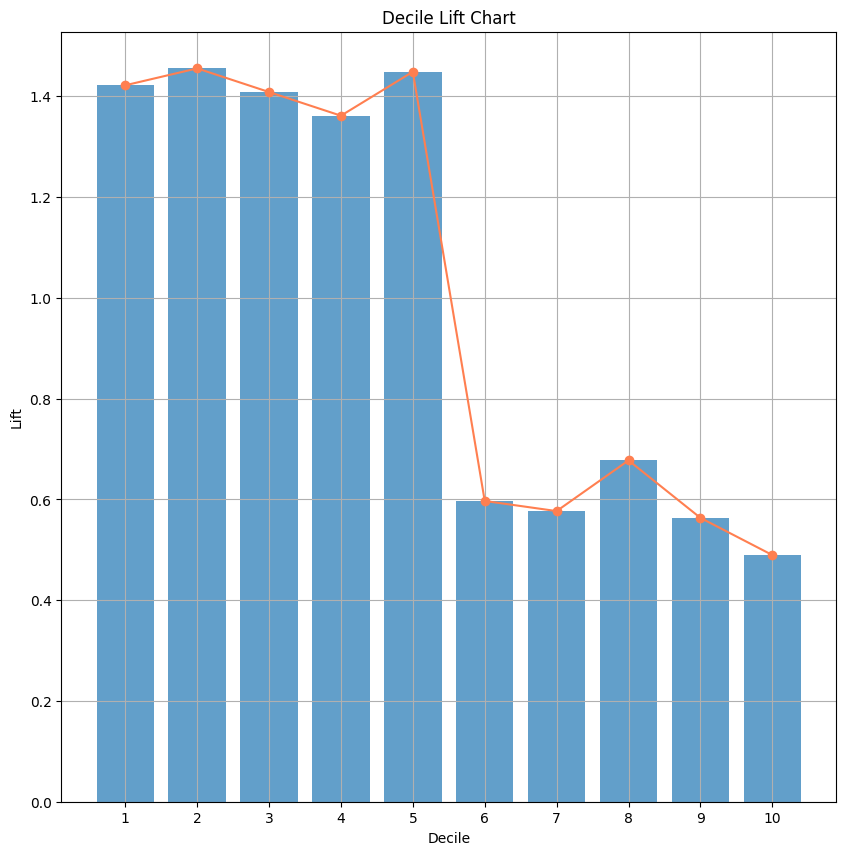

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe with true labels and predicted probabilities
data = pd.DataFrame({'actual': holdout_y_en, 'pred': y_scores})

# Sort the data by predicted probabilities
data = data.sort_values('pred', ascending=False)

# Calculate the number of samples in each decile
decile_size = int(len(data) / 10)

# Calculate the response rate in each decile
response_rates = []
for i in range(10):
    decile_data = data.iloc[i*decile_size:(i+1)*decile_size]
    response_rate = np.mean(decile_data['actual'])
    response_rates.append(response_rate)

# Calculate the overall response rate
overall_response_rate = np.mean(data['actual'])

# Calculate lift in each decile
lifts = [rate / overall_response_rate for rate in response_rates]

# Plot the Decile lift chart
plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), lifts, marker='o', color='coral')
plt.bar(range(1, 11), lifts, alpha=0.7)
plt.xticks(range(1, 11))
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.title('Decile Lift Chart')
plt.grid()
plt.show()


## Your answer of Q3.3:


# Additional Note from you